<a href="https://colab.research.google.com/github/Avinash-Jha-19/TensorFlow/blob/master/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Avinash Jha


# **Project Summary -**

In this project, your task is to identify major customer segments on a transnational data set which contains all
the transactions occurring between 01/12/2010 and 09/12/2011 for a UK based and registered non-store online
retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# **GitHub Link -**

https://github.com/Avinash-Jha-19/TensorFlow/blob/master/Online_Retail_Customer_Segmentation.ipynb

# **Problem Statement**


To identify major customer segments on a transnational dataset.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Datasets/Online_Retail.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [ ]:
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

5268

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum().sort_values(ascending = False))

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64


<Axes: >

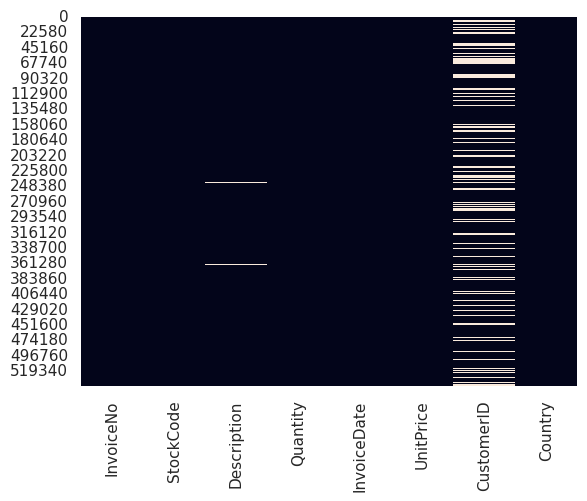

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar = False)

### What did you know about your dataset?

-   This dataset has 5,41,909 rows and 8 columns.
-   Out of which 5268 are duplicate values.
-   The column CustomerID has got 1,35,080 missing/null values & the column Description has got 1,454 missing/null values.
-   Remaining all the columns have 0 missing/null values.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

### **Variables Description**

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print(f"The number of unique values in {i} is {df[i].nunique()}.")

The number of unique values in InvoiceNo is 25900.
The number of unique values in StockCode is 4070.
The number of unique values in Description is 4223.
The number of unique values in Quantity is 722.
The number of unique values in InvoiceDate is 23260.
The number of unique values in UnitPrice is 1630.
The number of unique values in CustomerID is 4372.
The number of unique values in Country is 38.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Creating a copy of the data frame

retail_df = df.copy()

In [ ]:
# Dropping duplicate rows
print("Shape before dropping duplicates ",retail_df.shape)
retail_df = retail_df.drop_duplicates()
print("Shape after dropping duplicates ",retail_df.shape)

Shape before dropping duplicates  (541909, 8)
Shape after dropping duplicates  (536641, 8)


In [ ]:
# Dropping Null/Missing Values
retail_df.dropna(inplace = True)
print("Shape after dropping null/missing values ",retail_df.shape)

Shape after dropping null/missing values  (401604, 8)


In [ ]:
# Changing the type of InvoiceNo to str
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str')

In [ ]:
# Removing columns with Invoice No starting with 'c' because it denotes canceled orders
retail_df=retail_df[~retail_df['InvoiceNo'].str.contains('C')]

Project's primary goal is to identify major customer segments. Canceled orders do not contribute to understanding customer segments, as they represent transactions that did not result in completed purchases. Removing canceled orders can help focus on the behavior of customers who have made actual purchases, which is likely more relevant to segmentation.

In [ ]:
retail_df.shape

(392732, 8)

-   The shape of  the dataset after removing all the mising/null values and the canceled orders is 3,92,732 rows and 8 columns.

In [ ]:
retail_df.describe()

Quantity      UnitPrice     CustomerID
count  392732.000000  392732.000000  392732.000000
mean       13.153718       3.125596   15287.734822
std       181.588420      22.240725    1713.567773
min         1.000000       0.000000   12346.000000
25%         2.000000       1.250000   13955.000000
50%         6.000000       1.950000   15150.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000    8142.750000   18287.000000

## EDA

#### **What is the distribution of the number of unique invoices (InvoiceNo)?**

In [ ]:
# Grouping the data by 'InvoiceNo' and count the unique occurrences
invoice_counts = retail_df['InvoiceNo'].nunique()

print("Number of Unique Invoices (InvoiceNo):", invoice_counts)

Number of Unique Invoices (InvoiceNo): 18536


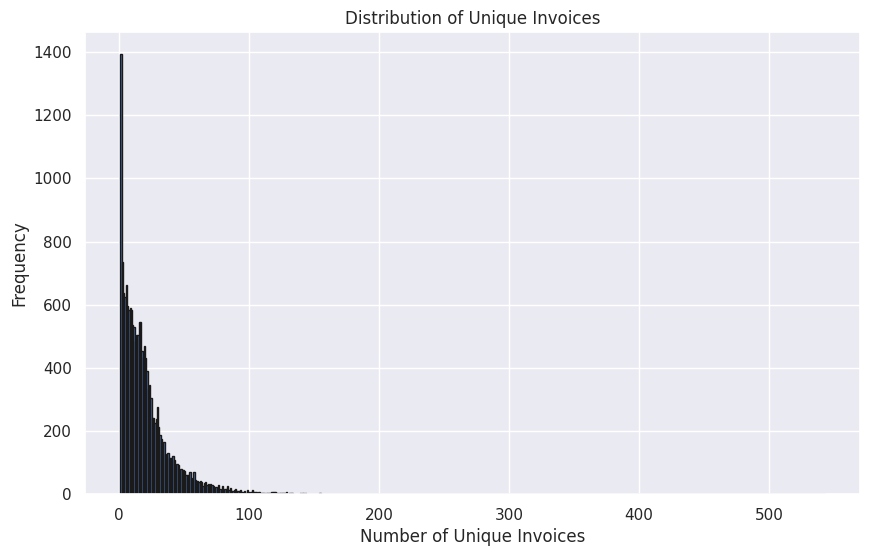

In [ ]:
invoice_counts = retail_df['InvoiceNo'].value_counts()

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(invoice_counts, bins=range(1, invoice_counts.max() + 2), edgecolor='k')
plt.xlabel('Number of Unique Invoices')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Invoices')
plt.show()

**Observations**
-  This plot is positively skewed & indicates that there are relatively few invoices with a very high number of occurrences, while the majority of invoices have lower frequencies. In this specific context, it suggests that there are some customers or transactions that are responsible for a disproportionately large number of invoices, while most customers or transactions occur less frequently.

#### **What is the average number of items per invoice & average invoice total?**

In [ ]:
# Calculating the average number of items per invoice
average_items_per_invoice = retail_df.groupby('InvoiceNo')['Quantity'].sum().mean()

# Calculating the average invoice total
average_invoice_total = retail_df.groupby('InvoiceNo').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum()).mean()

print("Average Number of Items per Invoice:", round(average_items_per_invoice,2))
print("Average Invoice Total:", round(average_invoice_total,2))


Average Number of Items per Invoice: 278.69
Average Invoice Total: 479.46


**Observations**
- We know many customers of the company are wholesalers which explains the high average number of items per invoice and the high average invoice total. Wholesalers typically purchase items in bulk, leading to larger quantities per order and higher total spending.

#### **How many unique products (StockCode) are there in the dataset?**

In [ ]:
# Count the number of unique products (StockCode)
unique_products = retail_df['StockCode'].nunique()
print("Number of Unique Products (StockCode):", unique_products)

Number of Unique Products (StockCode): 3665


**Observations**
- In total there are 3,665 unique products(StockCode) in this dataset.

#### **How many unique customers are there?**

In [ ]:
# Count the number of unique customers (CustomerID)
unique_customers = retail_df['CustomerID'].nunique()
print("Number of Unique Customers (CustomerID):", unique_customers)

Number of Unique Customers (CustomerID): 4339


**Observations**
- This dataset has 4,339 unique customers.

#### **How many unique countries are there?**

In [ ]:
# Count the number of unique countries (Country)
unique_countries = retail_df['Country'].nunique()
print("Number of Unique Countries:", unique_countries)


Number of Unique Countries: 37


**Observations**
- There are 37 unique countries in this dataset.

#### **What is the distribution of the number of transactions per customer?**

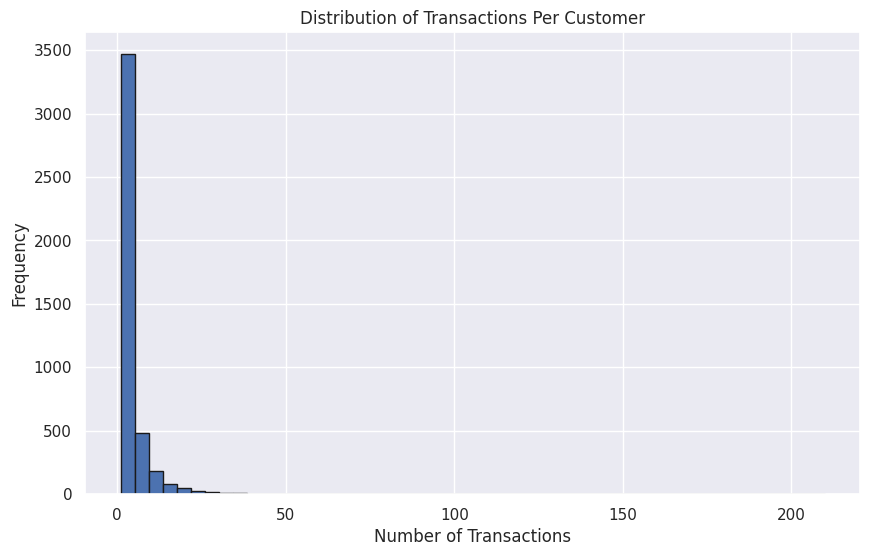

In [ ]:
# Grouping the data by 'CustomerID' and count the number of transactions per customer
transactions_per_customer = retail_df.groupby('CustomerID')['InvoiceNo'].nunique()

# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(transactions_per_customer, bins=50, edgecolor='k')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.title('Distribution of Transactions Per Customer')
plt.show()

**Observations**
- The positively skewed distribution of transactions per customer indicates that most customers make only a few purchases, while a minority of customers are highly active and make frequent transactions. This suggests the presence of a core customer group with occasional purchases and a smaller group of highly active, frequent buyers.

#### **What is the distribution of the total spending per customer?**

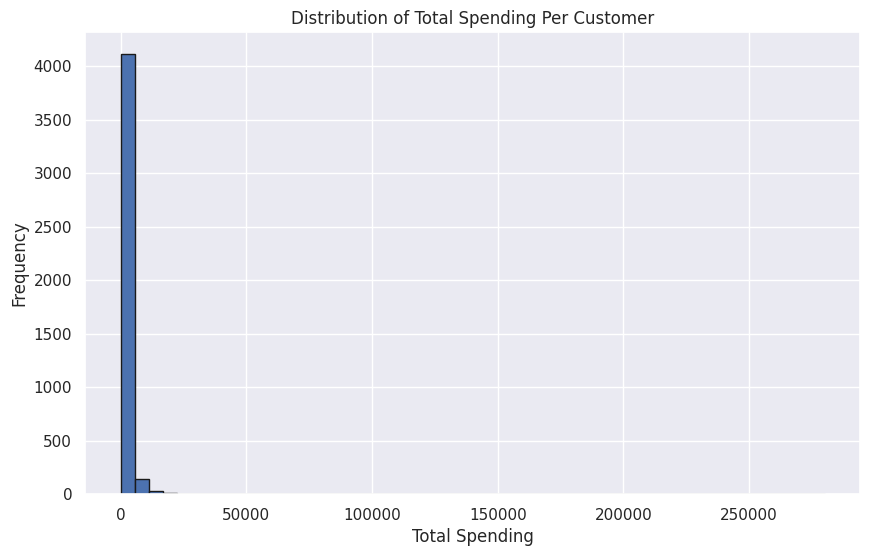

In [ ]:
# Calculate the total spending per customer
retail_df['TotalSpending'] = retail_df['Quantity'] * retail_df['UnitPrice']
total_spending_per_customer = retail_df.groupby('CustomerID')['TotalSpending'].sum()

# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(total_spending_per_customer, bins=50, edgecolor='k')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.title('Distribution of Total Spending Per Customer')
plt.show()


**Observations**
- The distribution of total spending per customer is positively skewed.
- This skewness suggests that most customers exhibit moderate spending behavior.
- A smaller fraction of customers contribute significantly higher total spending.
- There is a presence of both moderate and high-value customers in the dataset.

#### **Who are the top-spending customers?**

In [ ]:
# Find the top-spending customers
top_spending_customers = total_spending_per_customer.sort_values(ascending=False).head(10)
print("Top-Spending Customers:")
print(top_spending_customers)


Top-Spending Customers:
CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: TotalSpending, dtype: float64


#### **What is the distribution of customers by country?**

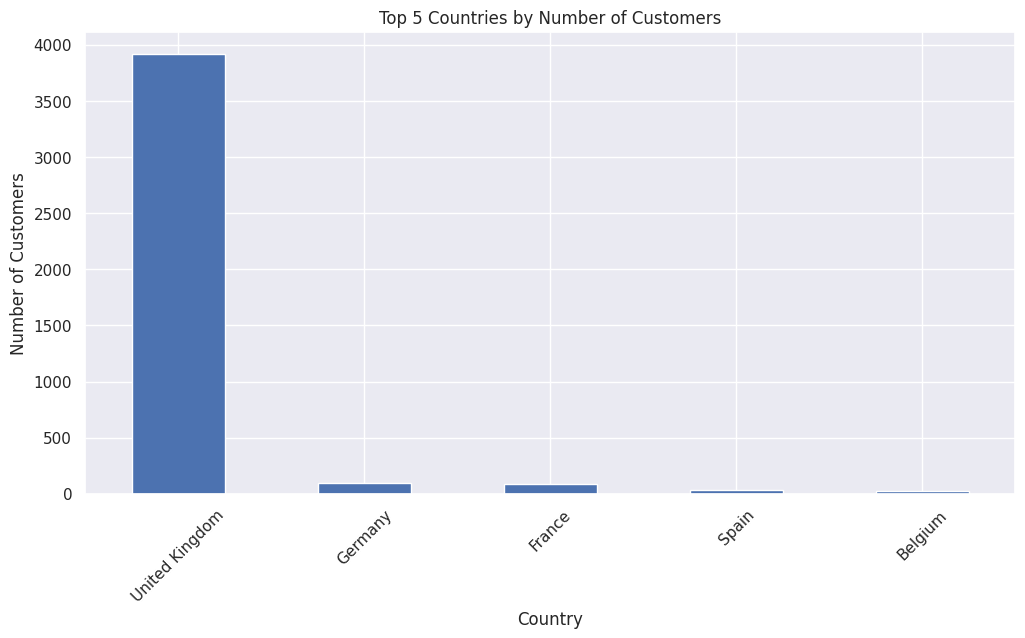

In [ ]:
# Grouping the data by 'Country' and counting the number of unique customers
customers_by_country = retail_df.groupby('Country')['CustomerID'].nunique()

# Sort the countries by the number of customers in descending order
sorted_countries = customers_by_country.sort_values(ascending=False)

# Top 5 countries
top_5_countries = sorted_countries.head(5)

# Creating a bar plot
plt.figure(figsize=(12, 6))
top_5_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Top 5 Countries by Number of Customers')
plt.xticks(rotation=45)
plt.show()

**Observations**
- Top 5 countries by number of customers are the UK, Germany, France, Spain, & Belgium.

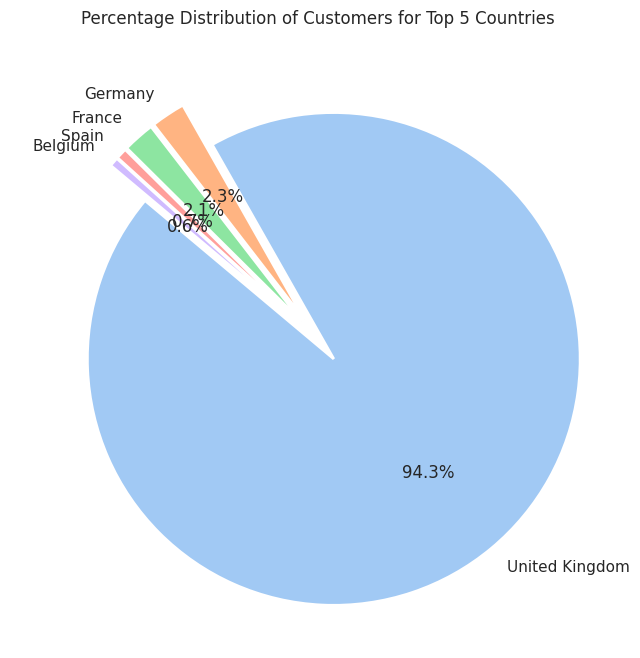

In [ ]:
# Checking the percentage distribution of cutomers for the top 5 countries.

# Calculate the percentages
percentage_distribution = (top_5_countries / top_5_countries.sum()) * 100

# Create a pie chart with gaps between sections using Matplotlib
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:len(percentage_distribution)]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # Create gaps between sections
plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.title('Percentage Distribution of Customers for Top 5 Countries')
plt.show()


**Observations**
- More than 94% of the customers are from the UK only, while the rest of them are from other countries.

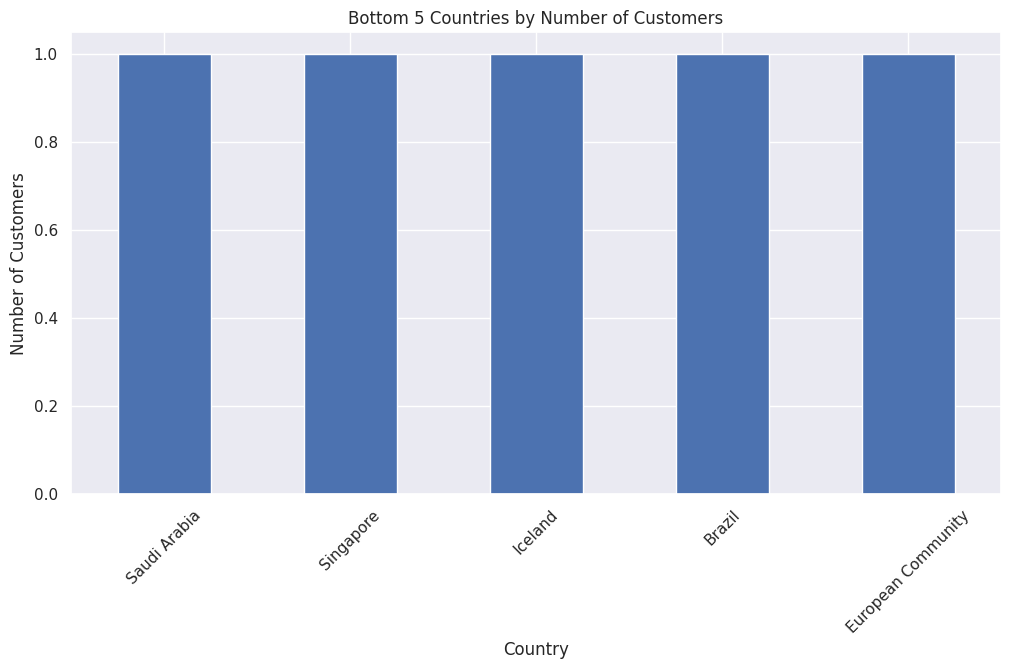

In [ ]:
# Bottom 5 countries
bottom_5_countries = sorted_countries.tail(5)

# Creating a bar plot
plt.figure(figsize=(12, 6))
bottom_5_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Bottom 5 Countries by Number of Customers')
plt.xticks(rotation=45)
plt.show()



**Observations**
- Countries with least number of customers are Saudi Arabia, Singapore, Iceland, Brazil, & European Community.

#### **What are the most & least frequently purchased products (by Stock Code)?**

In [ ]:
#Most frequently purchased products by Stock Code
frequent_products_by_stockcode = retail_df['StockCode'].value_counts().head(10)
print("Most Frequently Purchased Products by Stock Code:")
print(frequent_products_by_stockcode)

Most Frequently Purchased Products by Stock Code:
85123A    2023
22423     1714
85099B    1615
84879     1395
47566     1390
20725     1304
22720     1152
POST      1099
23203     1091
20727     1078
Name: StockCode, dtype: int64


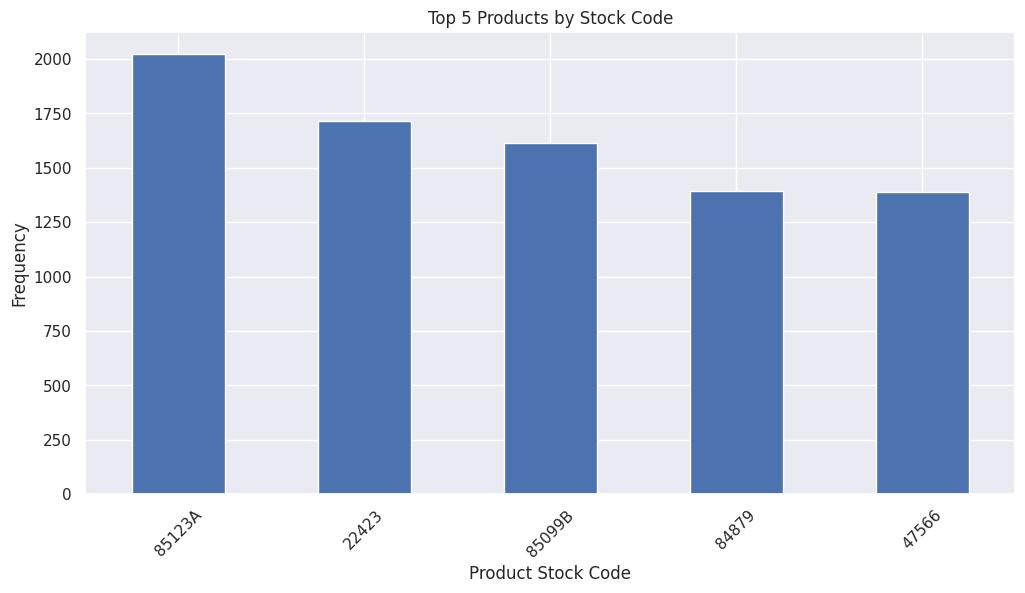

In [ ]:
# Top 5 products by Stock Code
top_5_products_stockcode = retail_df['StockCode'].value_counts().head(5)

# Creating a bar plot
plt.figure(figsize=(12, 6))
top_5_products_stockcode.plot(kind='bar')
plt.xlabel('Product Stock Code')
plt.ylabel('Frequency')
plt.title('Top 5 Products by Stock Code')
plt.xticks(rotation=45)
plt.show()


**Observations**
- Most frequently puurchased products by Stock Code are 85123A, 22423, 85099B, 84879, & 47566.

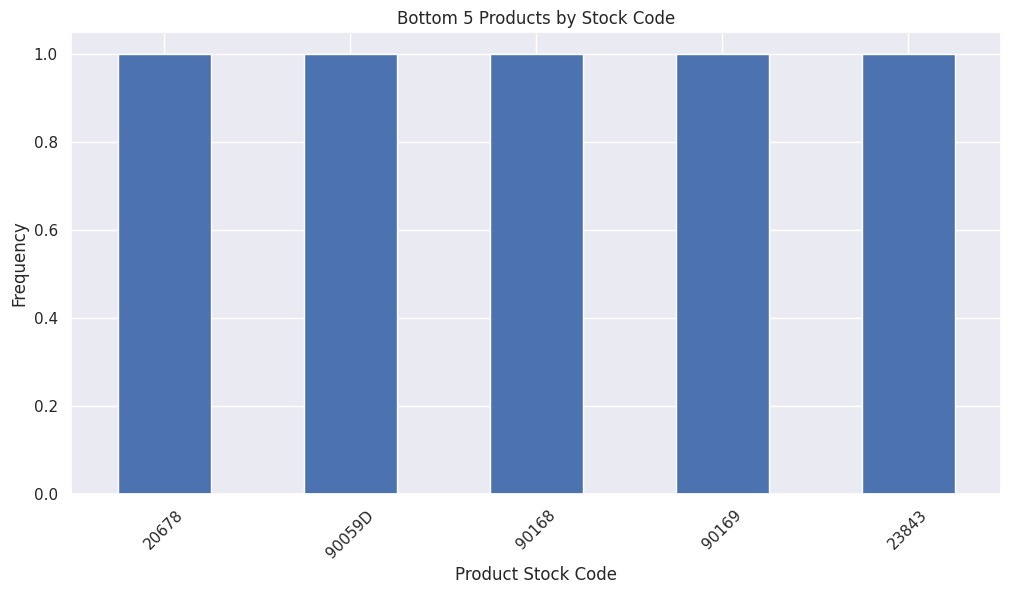

In [ ]:
# Bottom 5 products by Stock Code
bottom_5_products_stockcode = retail_df['StockCode'].value_counts().tail(5)

# Creating a bar plot
plt.figure(figsize=(12, 6))
bottom_5_products_stockcode.plot(kind='bar')
plt.xlabel('Product Stock Code')
plt.ylabel('Frequency')
plt.title('Bottom 5 Products by Stock Code')
plt.xticks(rotation=45)
plt.show()

**Observations**
- Least frequently puurchased products by Stock Code are 20678, 90059D, 90168, 90169, & 23843.

#### **What are the most & least frequently purchased products (by Description)?**

In [ ]:
# Most frequently purchased products by Description
frequent_products_by_description = retail_df['Description'].value_counts().head(10)
print("\nMost Frequently Purchased Products by Description:")
print(frequent_products_by_description)


Most Frequently Purchased Products by Description:
WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1390
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
Name: Description, dtype: int64


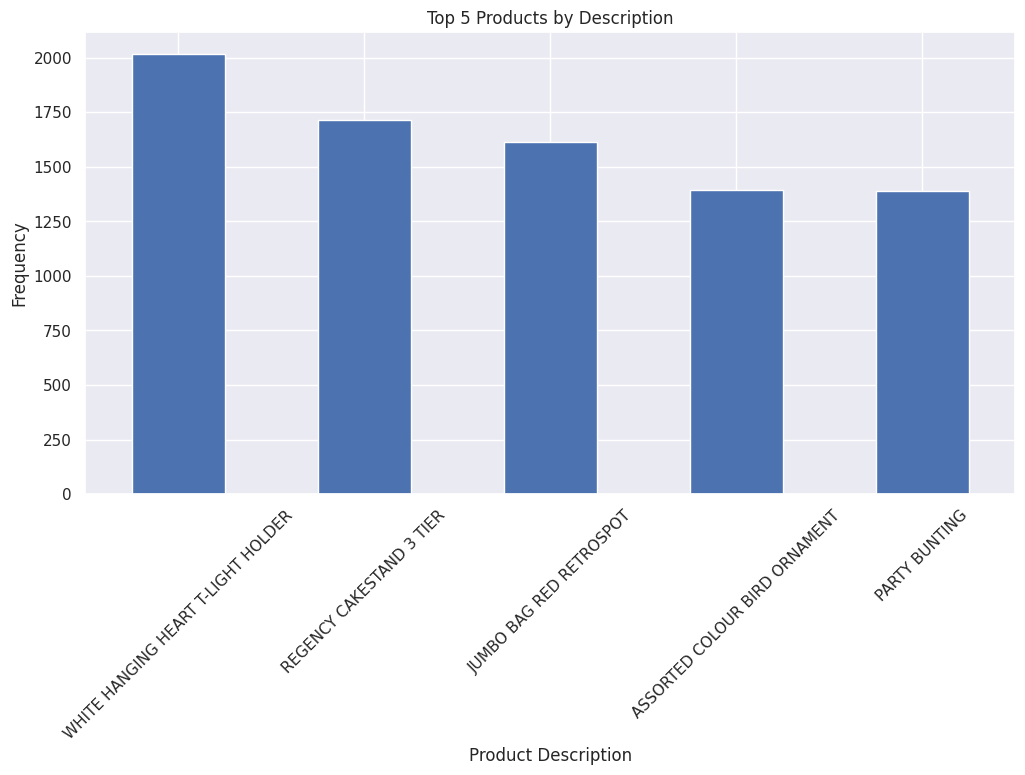

In [ ]:
# Top 5 products by description
top_5_products = retail_df['Description'].value_counts().head(5)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_5_products.plot(kind='bar')
plt.xlabel('Product Description')
plt.ylabel('Frequency')
plt.title('Top 5 Products by Description')
plt.xticks(rotation=45)
plt.show()

**Observations**
- Most frequently purchased products by Description are:



1.   WHITE HANGING HEART T-LIGHT HOLDER
2.   REGENCY CAKESTAND 3 TIER
3. JUMBO BAG RED RETROSPOT  
4. ASSORTED COLOUR BIRD ORNAMENT   
5. PARTY BUNTING    








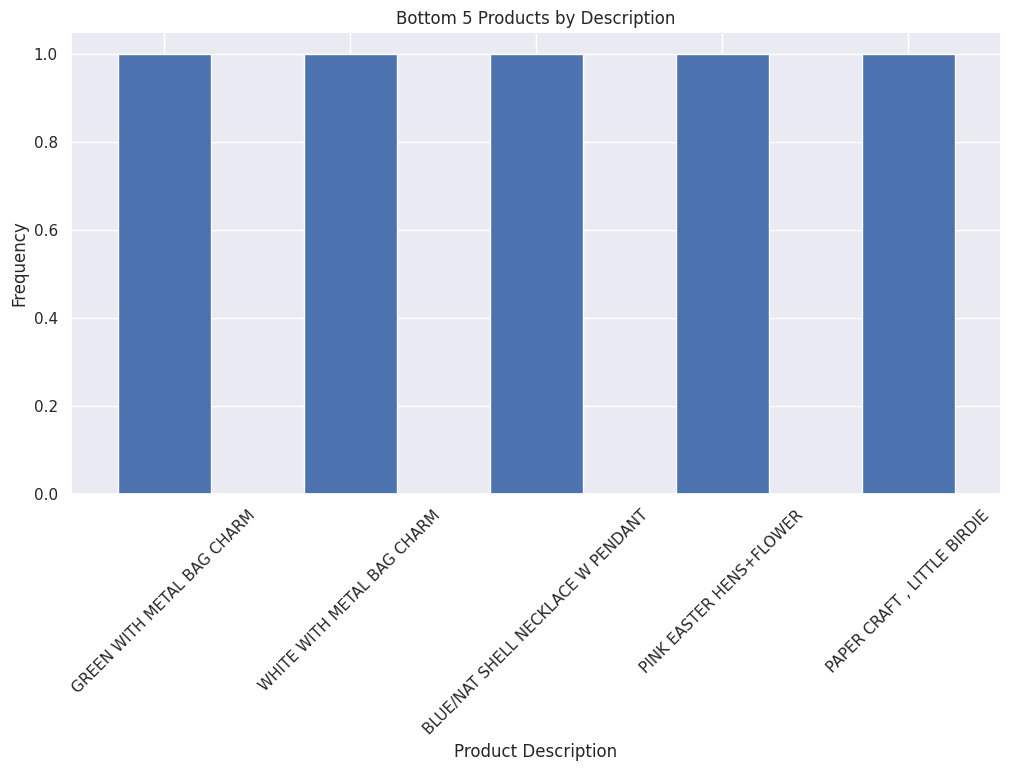

In [ ]:
# Bottom 5 products by description
bottom_5_products = retail_df['Description'].value_counts().tail(5)

# Create a bar plot
plt.figure(figsize=(12, 6))
bottom_5_products.plot(kind='bar')
plt.xlabel('Product Description')
plt.ylabel('Frequency')
plt.title('Bottom 5 Products by Description')
plt.xticks(rotation=45)
plt.show()

**Observations**
- Least frequently purchased products by Description are:


1.   GREEN WITH METAL BAG CHARM
2.   WHITE WITH METAL BAG CHARM
3. BLUE/NAT SHELL NECKLACE W PENDANT
4. PINK EASTER HENS+FLOWER
5. PAPER CRAFT, LITTLE BIRDIE



#### **What is the distribution of the unit prices?**

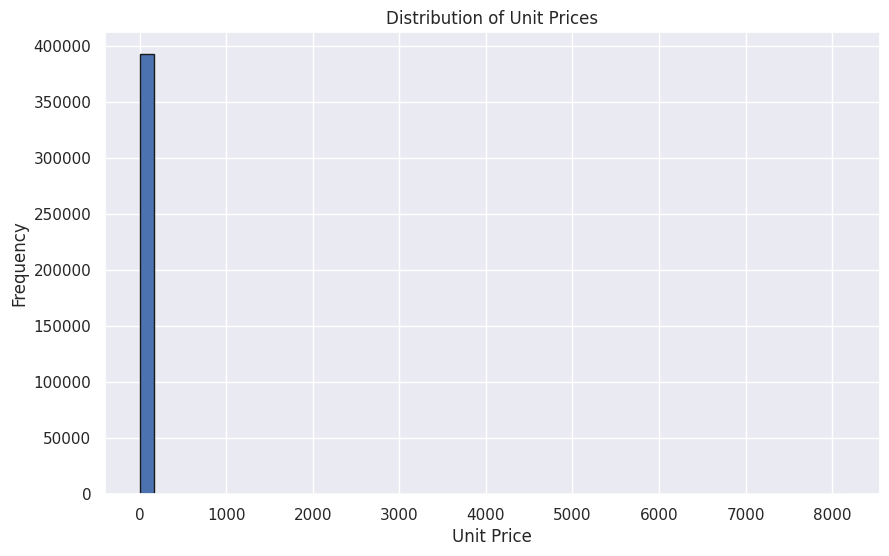

In [ ]:
# Creating a histogram to visualize the distribution of unit prices
plt.figure(figsize=(10, 6))
plt.hist(retail_df['UnitPrice'], bins=50, edgecolor='k')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Distribution of Unit Prices')
plt.show()

**Observations**
-  Most unit prices are concentrated in the lower price range, with very few items having higher unit prices.
- This suggests that the company primarily sells lower-priced items, possibly with a few high-value items as well.

In [ ]:
retail_df['UnitPrice'].min(),round(retail_df['UnitPrice'].mean(),2),retail_df['UnitPrice'].max()

(0.0, 3.13, 8142.75)

**Observations**
- These statistics reinforce the observation that the majority of unit prices are concentrated at lower values, with an average unit price of 3.13. However, there are also some exceptionally high-priced items, as indicated by the maximum unit price of 8142.75.

#### **How do sales vary over time (monthly)?**

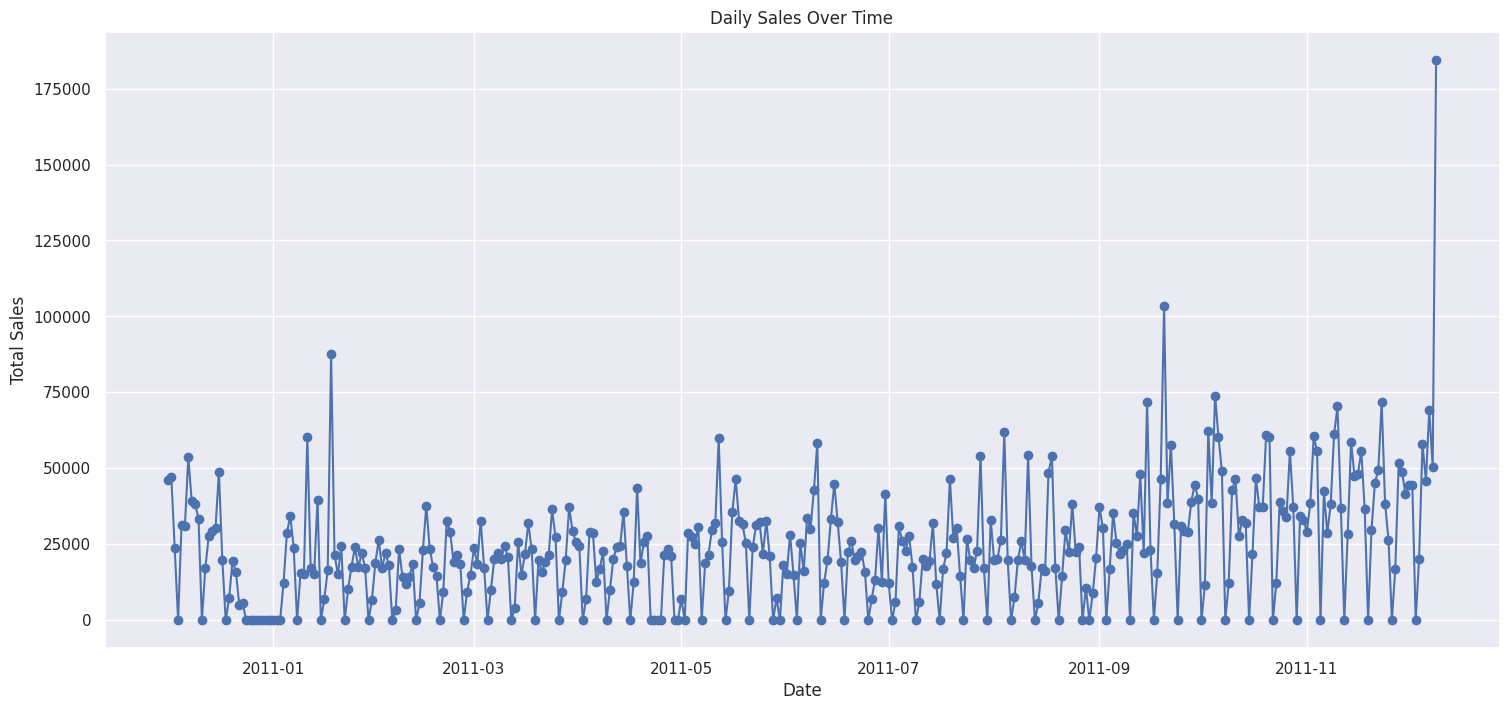

In [ ]:
# Convert the 'InvoiceDate' column to datetime
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

# Create a new DataFrame with 'InvoiceDate' as the index and 'TotalSpending' as the column
daily_sales = retail_df.set_index('InvoiceDate').resample('D')['TotalSpending'].sum()

# Plot daily sales over time
plt.figure(figsize=(18, 8))
plt.plot(daily_sales, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales Over Time')
plt.grid(True)

**Observations**
- By looking at the plot it appears that as we approach towards the end of the year we see that peaks are going up slowly which shows that the total sales are higher at the end of the year as compared to the beginning of the year.
- Suggesting a potential seasonality or yearly pattern in the sales
data, specially during the holiday season when gift shopping and holiday preparations are at their highest.


#### **Are there any noticeable seasonal trends?**

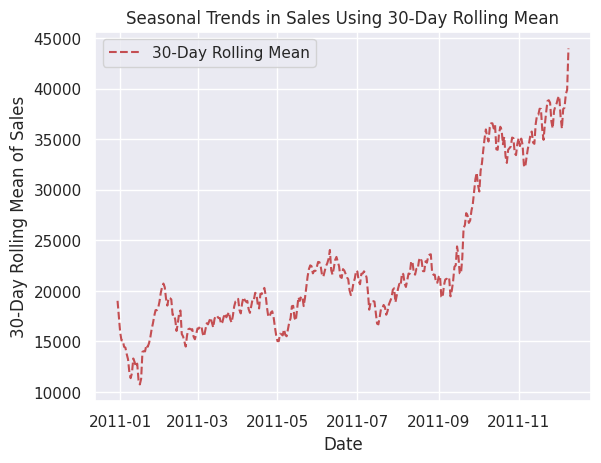

In [ ]:
# Detect seasonal trends using rolling mean
rolling_mean = daily_sales.rolling(window=30).mean()
plt.plot(rolling_mean, linestyle='--', color='r', label='30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('30-Day Rolling Mean of Sales')
plt.title('Seasonal Trends in Sales Using 30-Day Rolling Mean')
plt.legend()
plt.show()

**Observations**
* The red dashed line represents the 30-day rolling mean of daily sales data.
- A rolling mean is a moving average that smoothes out short-term fluctuations in the data to highlight longer-term trends.
- For each day, the rolling mean is calculated as the average of the sales values for the current day and the previous 29 days (a 30-day window).
- The rolling mean provides a smoothed representation of sales trends over time, reducing the impact of daily fluctuations and noise in the data.

- The rolling mean line shows an upward trend, it suggests that sales are increasing over the 30-day periods, indicating positive sales momentum.

#### **What are the busiest days for sales?**

In [ ]:
# Find the busiest days for sales
busiest_days = daily_sales.nlargest(10)
print("Busiest Days for Sales:")
print(busiest_days)

Busiest Days for Sales:
InvoiceDate
2011-12-09    184329.66
2011-09-20    103377.68
2011-01-18     87559.21
2011-10-05     73975.57
2011-09-15     71926.69
2011-11-23     71722.75
2011-11-10     70373.03
2011-12-07     69230.60
2011-10-03     62143.07
2011-08-04     62074.19
Name: TotalSpending, dtype: float64


**Observations**
- The busiest day for sales was December 9, 2011.

#### **How do sales vary by country?**

Total Sales for the Top 5 Countries:
Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Name: TotalSpending, dtype: float64


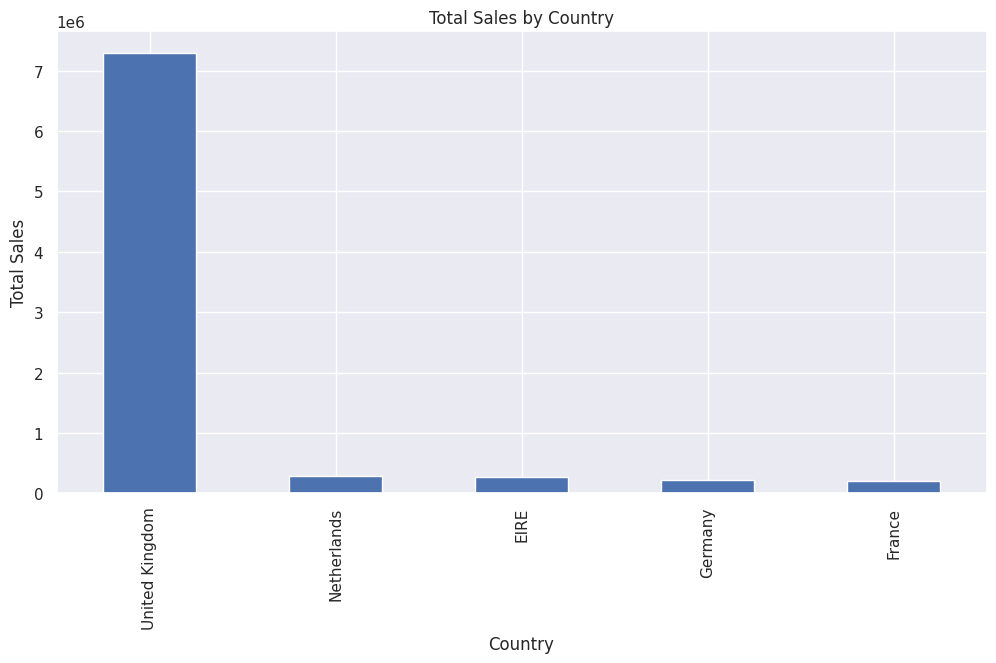

In [ ]:
# Calculating total sales per country
sales_by_country = retail_df.groupby('Country')['TotalSpending'].sum().sort_values(ascending=False)

# Select only the top 5 countries
top5countries = sales_by_country.head(5)

# Print the total sales for the top 5 countries
print("Total Sales for the Top 5 Countries:")
print(top5countries)

# Creating a bar plot to visualize sales by country
plt.figure(figsize=(12, 6))
top5countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Total Sales by Country')
plt.xticks(rotation=90)
plt.show()

**Observations**
- Top 5 countries by sales are the UK, Netherlands, EIRE, Germany, & France.

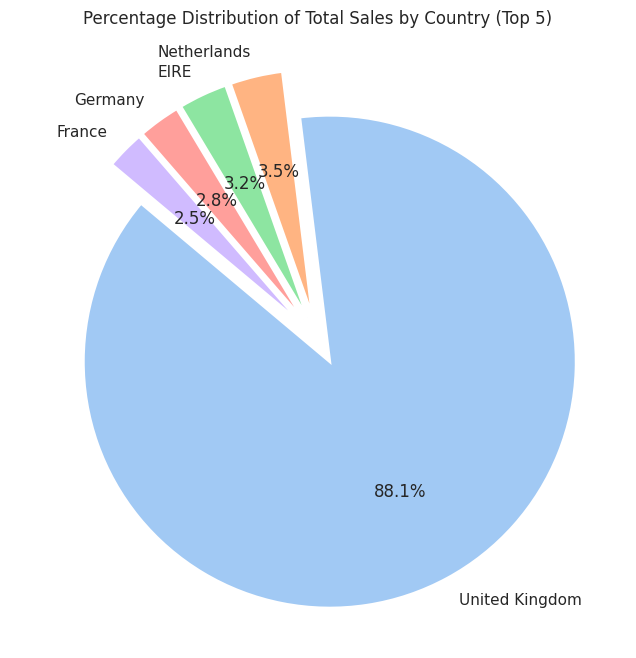

In [ ]:
# Checking percentage distribution
# Calculate the percentage distribution
percentage_distribution = (top5countries / top5countries.sum()) * 100

# Create a pie chart with gaps between sections using Matplotlib
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:len(percentage_distribution)]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # Create gaps between sections
plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
plt.title('Percentage Distribution of Total Sales by Country (Top 5)')
plt.show()


**Observations**
- The UK alone contributed to 88% of the sales, while the rest of it was contributed by other countries.

#### **Checking Distribution of Quantity column.**

<Axes: title={'center': 'Distribution of Quantity'}, xlabel='Quantity', ylabel='Density'>

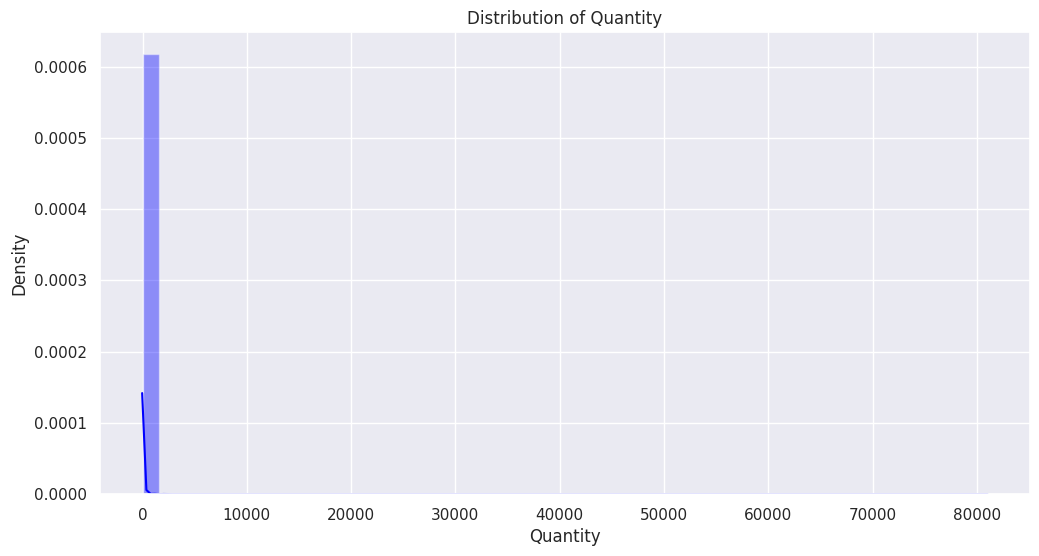

In [ ]:
# Distribution of Quantity
plt.figure(figsize=(12,6))
plt.title('Distribution of Quantity')
sns.distplot(retail_df['Quantity'],color="blue")

**Observation**
- The highly positively skewed distribution of Quantity suggests that the majority of transactions involve a relatively small quantity of items, while there are relatively few transactions with a large quantity of items.

<Axes: title={'center': 'log distribution of Quantity'}, xlabel='Quantity', ylabel='Density'>

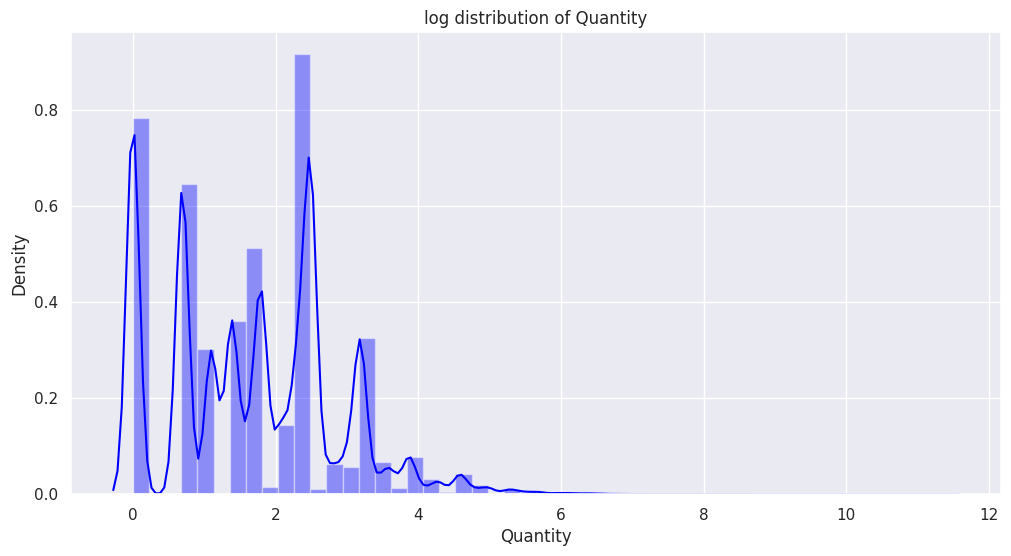

In [ ]:
# Let us perform log transformation on this skewed data.
plt.figure(figsize=(12,6))
plt.title('log distribution of Quantity')
sns.distplot(np.log(retail_df['Quantity']),color="blue")

**Observation**
- After the log transformation the distribution got a little better. It is not perfect but now it is better to analyse.

#### **Checking distribution of Unit Price.**

<Axes: title={'center': 'distribution of UnitPrice'}, xlabel='UnitPrice', ylabel='Density'>

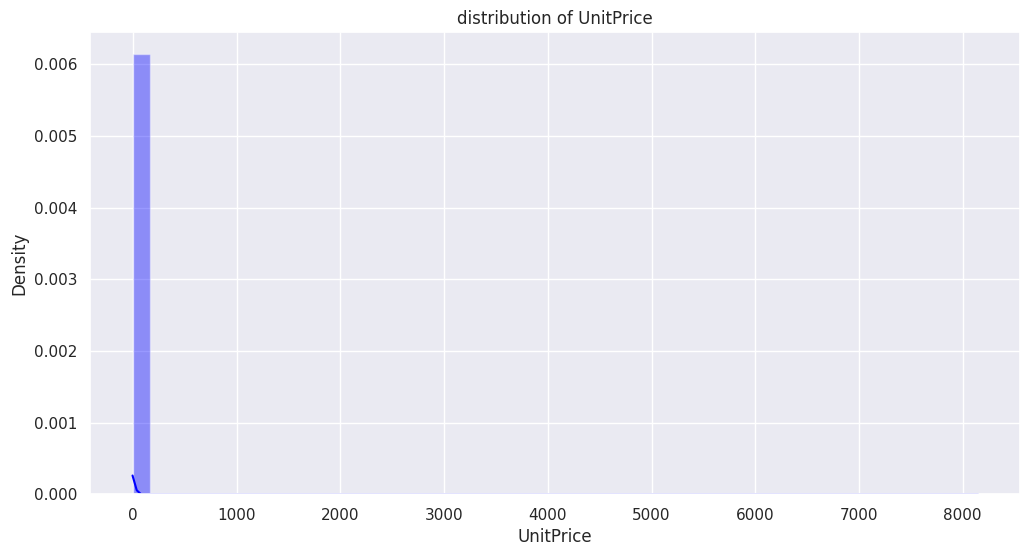

In [ ]:
# Distribution of Unit Price
plt.figure(figsize=(12,6))
plt.title('distribution of UnitPrice')
sns.distplot(retail_df['UnitPrice'],color="blue")

**Observations**
- The highly positively skewed distribution of UnitPrice suggests that most of the products sold have relatively low unit prices, with only a few products having higher prices.

<Axes: title={'center': 'Log Distribution of UnitPrice'}, xlabel='UnitPrice', ylabel='Density'>

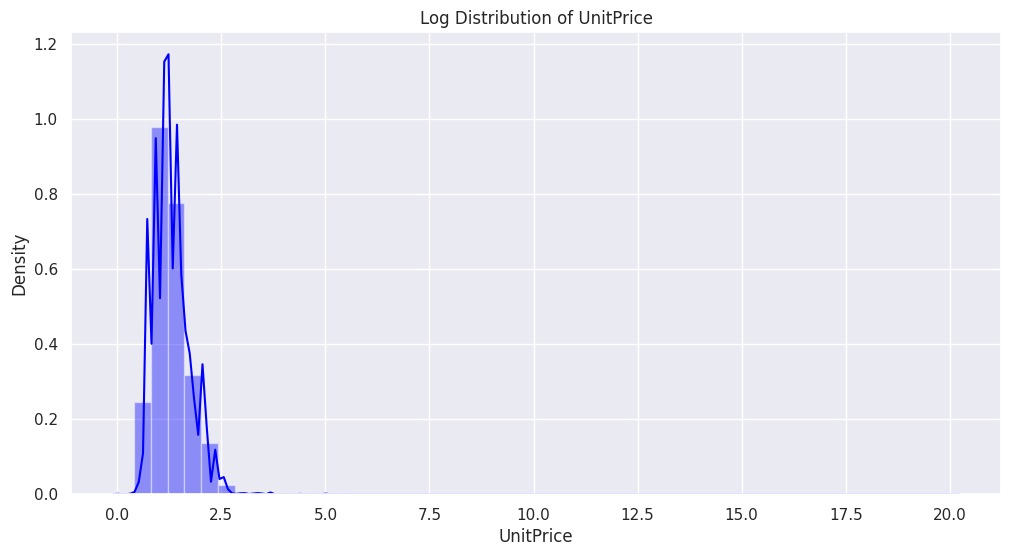

In [ ]:
# Let us perform transformation on this skewed data.
plt.figure(figsize=(12,6))
plt.title('Log Distribution of UnitPrice')
sns.distplot(np.cbrt(retail_df['UnitPrice']),color="blue")

- Now, after the transformation the distribution has got a little better.

#### **Checking distribution of Total spending.**

<Axes: title={'center': 'Distribution of Amount'}, xlabel='TotalSpending', ylabel='Density'>

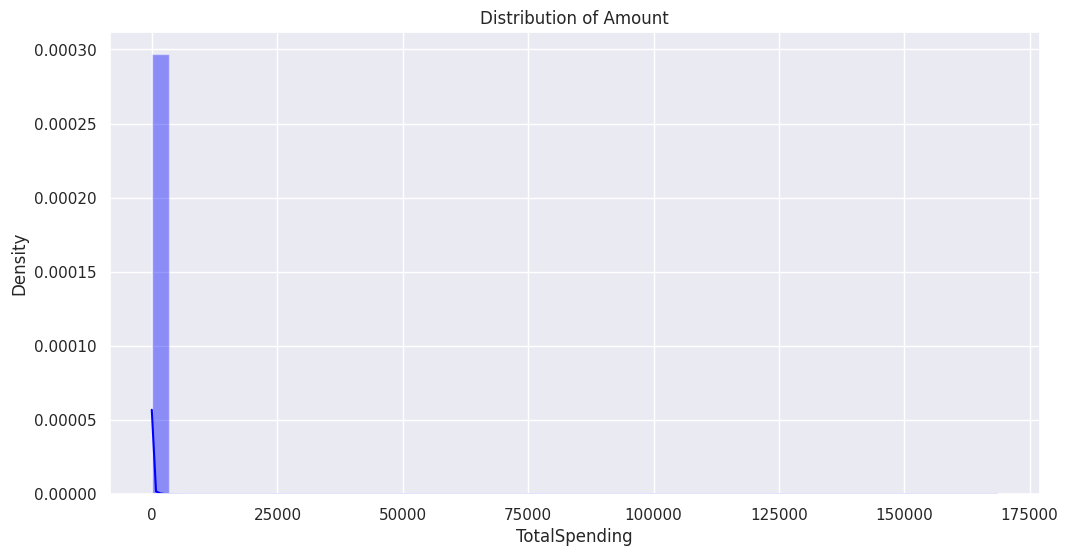

In [ ]:
# Distribution of Total Spending
plt.figure(figsize=(12,6))
plt.title('Distribution of Amount')
sns.distplot(retail_df['TotalSpending'],color="blue")

**Observation**
- The highly positively skewed distribution of TotalSpending suggests that the majority of transactions in the dataset involve relatively low amounts spent, while a smaller number of transactions account for significantly higher amounts.

In [ ]:
retail_df['TotalSpending'].describe()

count    392732.000000
mean         22.629195
std         311.083465
min           0.000000
25%           4.950000
50%          12.390000
75%          19.800000
max      168469.600000
Name: TotalSpending, dtype: float64

<Axes: title={'center': 'Distribution of Amount'}, xlabel='TotalSpending', ylabel='Density'>

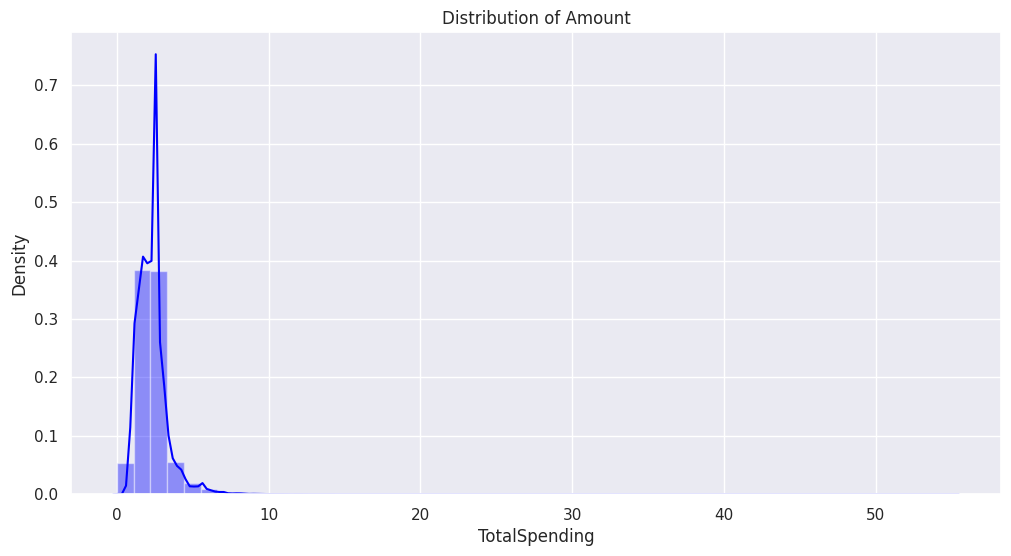

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Amount')
sns.distplot(np.cbrt(retail_df['TotalSpending']),color="blue")

**Observations**
- The distribution has got a little better after applying transformation.

## **Feature Engineering**

* Converting InvoiceDate to proper date time format.

In [ ]:
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [ ]:
# Creating a new feature Day which contains day names.
retail_df['Day'] = retail_df['InvoiceDate'].dt.day_name()

In [ ]:
# Creating some more new features year,month_num,day_num,hour,minute.
retail_df ["year"] = retail_df ["InvoiceDate"].apply(lambda x: x.year)
retail_df ["month_num"] = retail_df ["InvoiceDate"].apply(lambda x: x.month)
retail_df ["day_num"] = retail_df ["InvoiceDate"].apply(lambda x: x.day)
retail_df ["hour"] = retail_df ["InvoiceDate"].apply(lambda x: x.hour)
retail_df ["minute"] = retail_df ["InvoiceDate"].apply(lambda x: x.minute)

In [ ]:
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSpending  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom          15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom          22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          20.34   

         Day  year  month_num  day_num  hour  minute  
0  Wednesday  2010         12        1     8      26  
1  Wednesday  2010         12        1     8      26  
2  Wednesday  2010         12        1     8      26  
3  Wednesday  2010         12        1     8      26  
4  Wednesday  2010         12        1     8      26

In [ ]:
# Creating a new feature month which consists of month name.
retail_df['Month'] = retail_df['InvoiceDate'].dt.month_name()

In [ ]:
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSpending  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom          15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom          22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          20.34   

         Day  year  month_num  day_num  hour  minute     Month  
0  Wednesday  2010         12        1     8      26  December  
1  Wednesday  2010         12        1     8      26  December  
2  Wednesday  2010         12        1     8      26  December  
3  Wednesday  2010         12        1     8      26  December  
4  Wednesday  2010         12        1     8      26  December

In [ ]:
# Calculating the count of each 'Day' and reset the index
day_df = retail_df['Day'].value_counts().reset_index()

# Renaming the columns for clarity
day_df.rename(columns={'index': 'Day_Name', 'Day': 'Count'}, inplace=True)

# Display the resulting DataFrame
day_df


Day_Name  Count
0   Thursday  79260
1  Wednesday  68043
2    Tuesday  65747
3     Monday  64237
4     Sunday  61214
5     Friday  54231

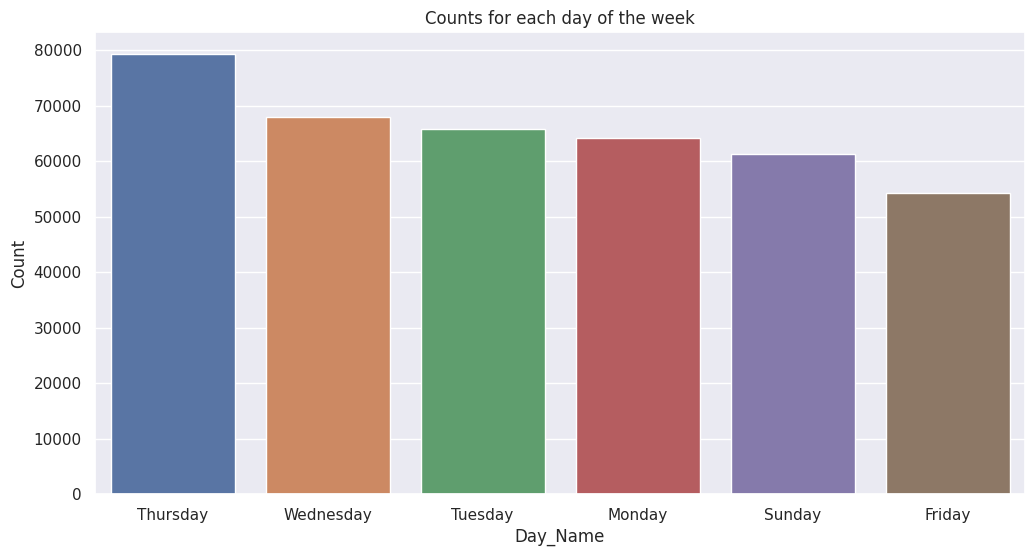

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Counts for each day of the week')
sns.barplot(x='Day_Name', y='Count', data=day_df)
plt.show()

**Observations**
- The sale is highest on Thursday followed by Wednesday and Tuesday.

In [ ]:
# Repeating the same for months.

month_df = retail_df['Month'].value_counts().reset_index()
month_df.rename(columns = {'index': 'Month_Name'}, inplace = True)
month_df.rename(columns = {'Month': 'Count'}, inplace = True)
month_df

Month_Name  Count
0    November  63182
1     October  48796
2    December  42699
3   September  39671
4         May  28075
5        June  26926
6       March  26872
7      August  26796
8        July  26582
9       April  22435
10    January  20991
11   February  19707

<Axes: title={'center': 'Counts for each Month'}, xlabel='Month_Name', ylabel='Count'>

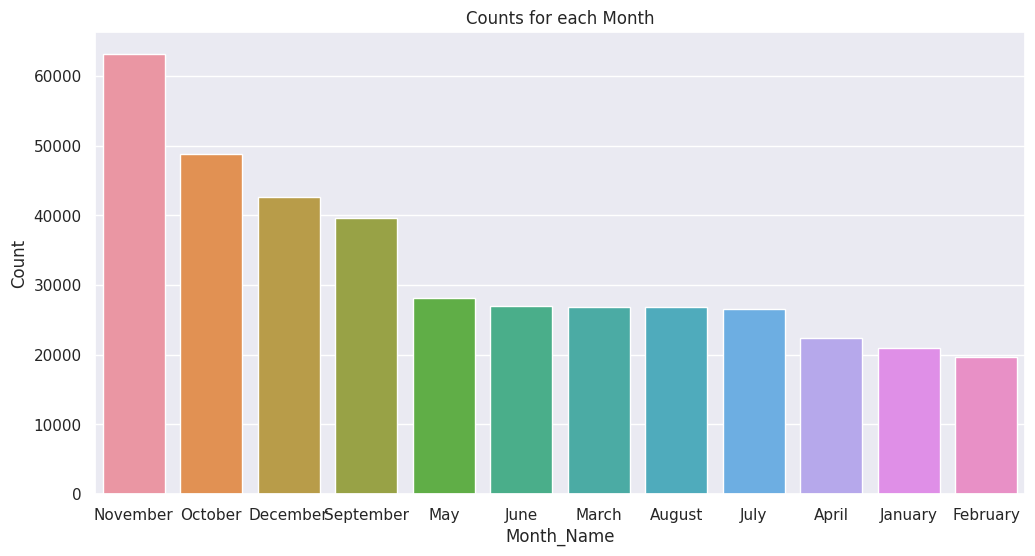

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Counts for each Month')
sns.barplot(x = 'Month_Name',y = 'Count',data = month_df)

**Observations**
- The sale is highest in the month of November followed by October and December.

In [ ]:
hour_df = retail_df['hour'].value_counts().reset_index()
hour_df.rename(columns = {'index': 'Hour_Name'}, inplace = True)
hour_df.rename(columns = {'hour': 'Count'}, inplace = True)
hour_df

Hour_Name  Count
0          12  70942
1          13  63024
2          14  53260
3          11  48373
4          15  44793
5          10  37775
6          16  23719
7           9  21928
8          17  12942
9           8   8688
10         19   3234
11         18   2896
12         20    778
13          7    379
14          6      1

<Axes: title={'center': 'Counts for each Hour'}, xlabel='Hour_Name', ylabel='Count'>

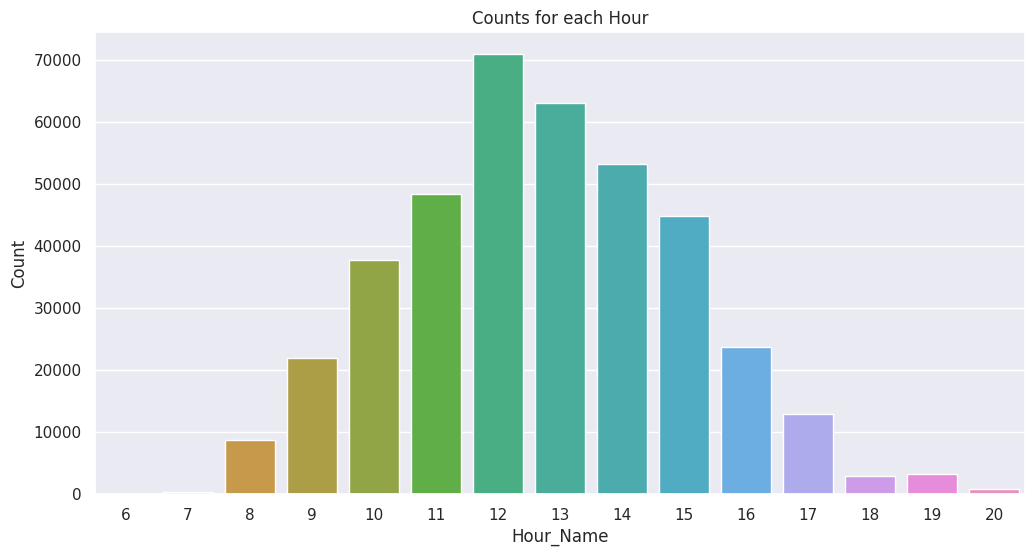

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Counts for each Hour')
sns.barplot(x = 'Hour_Name',y = 'Count',data = hour_df)

**Observations**
- The sale is highest during the hours of  12, 13, 14.

In [ ]:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
retail_df['Time_category'] = retail_df['hour'].apply(time_type)

<Axes: title={'center': 'Time_category'}, xlabel='Time_category', ylabel='count'>

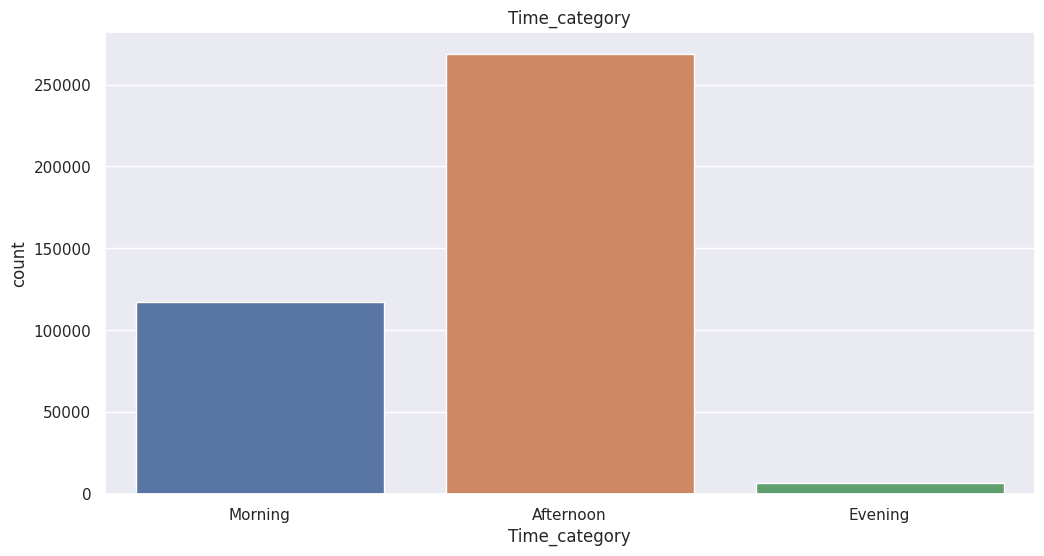

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Time_category')
sns.countplot(x='Time_category',data = retail_df)

**Observations**
- Here, after categorising the hours we can clearly see that the sale is highest during the Afternoon time.

Earlier, we found out that United Kingdom has maximum sales revenue(88%) as well as customers(94%). Therefore, we will be taking the data corresponding to the United Kingdom for the purpose of this analysis.

In [ ]:
uk_df = retail_df[retail_df.Country == "United Kingdom"]
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349227 entries, 0 to 541893
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      349227 non-null  object        
 1   StockCode      349227 non-null  object        
 2   Description    349227 non-null  object        
 3   Quantity       349227 non-null  int64         
 4   InvoiceDate    349227 non-null  datetime64[ns]
 5   UnitPrice      349227 non-null  float64       
 6   CustomerID     349227 non-null  float64       
 7   Country        349227 non-null  object        
 8   TotalSpending  349227 non-null  float64       
 9   Day            349227 non-null  object        
 10  year           349227 non-null  int64         
 11  month_num      349227 non-null  int64         
 12  day_num        349227 non-null  int64         
 13  hour           349227 non-null  int64         
 14  minute         349227 non-null  int64         
 15  

#### **Most popular products in the United Kingdom.**

In [ ]:
uk_product = uk_df.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
uk_product.head(5)

StockCode                         Description  Quantity
2514     23843         PAPER CRAFT , LITTLE BIRDIE     80995
2016     23166      MEDIUM CERAMIC TOP STORAGE JAR     76919
2690     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS     49086
3548    85099B             JUMBO BAG RED RETROSPOT     41878
3555    85123A  WHITE HANGING HEART T-LIGHT HOLDER     34630

In [ ]:
# Find the unique number of InvoiceNo  per customer for analysis of United Kingdom
groupby_customers = pd.DataFrame(uk_df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.describe()

InvoiceNo
count  3921.000000
mean      4.246111
std       7.205750
min       1.000000
25%       1.000000
50%       2.000000
75%       5.000000
max     210.000000

**Observations**
- There are a total of 3,921 unique customers in the UK dataset.
- On average, each customer in the UK made approximately 4.25 unique purchases (invoices).
- The standard deviation is relatively high at 7.21, indicating a wide variability in the number of invoices per customer. Some customers have significantly more invoices than others, leading to the high standard deviation.
- The minimum number of unique invoices for a customer is 1, meaning that at least one customer had only a single unique purchase during the analyzed period.
- The maximum number of unique invoices for a customer is 210, indicating that at least one customer had a very large number of transactions during the analyzed period.

## RFM Segmentation

RFM is a data modeling method used to analyze customer value i.e., to identify a company's or an organization's best customers by using certain measures. It stands for recency, frequency, and monetary, which are just three metrics that describe what the customers did.

- Recency (R) of a customer: Days since the last purchase.
- Frequency (F) of the bookings/turnover of a customer: Number of purchases, e.g., in 6 months.
- Monetary (M) - The total turnover of a customer: Sum of sales, e.g., in 6 months.

###Performing RFM Segmentation and RFM Analysis, Step by Step
- The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.
- The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M), using Excel or another tool.

In [ ]:
latest_date = uk_df["InvoiceDate"].max() + pd.DateOffset(1)
print("RFM Analysis Date :", latest_date)

start_date = latest_date - pd.DateOffset(days = 365)
print("Start Date when taking 1 year data for analysis :", start_date)

RFM Analysis Date : 2011-12-10 12:49:00
Start Date when taking 1 year data for analysis : 2010-12-10 12:49:00


In [ ]:
# Create RFM Modelling scores for each customer
rfm_df = uk_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalSpending': lambda x: x.sum()})

# Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSpending': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12747.0        2        103   4196.01
2     12748.0        1       4413  33053.19
3     12749.0        4        199   4090.88
4     12820.0        3         59    942.34

In [ ]:
# Let us check the stats for Recency
rfm_df['Recency'].describe()

count    3921.000000
mean       92.188472
std        99.528995
min         1.000000
25%        18.000000
50%        51.000000
75%       143.000000
max       374.000000
Name: Recency, dtype: float64

<Axes: xlabel='Recency', ylabel='Density'>

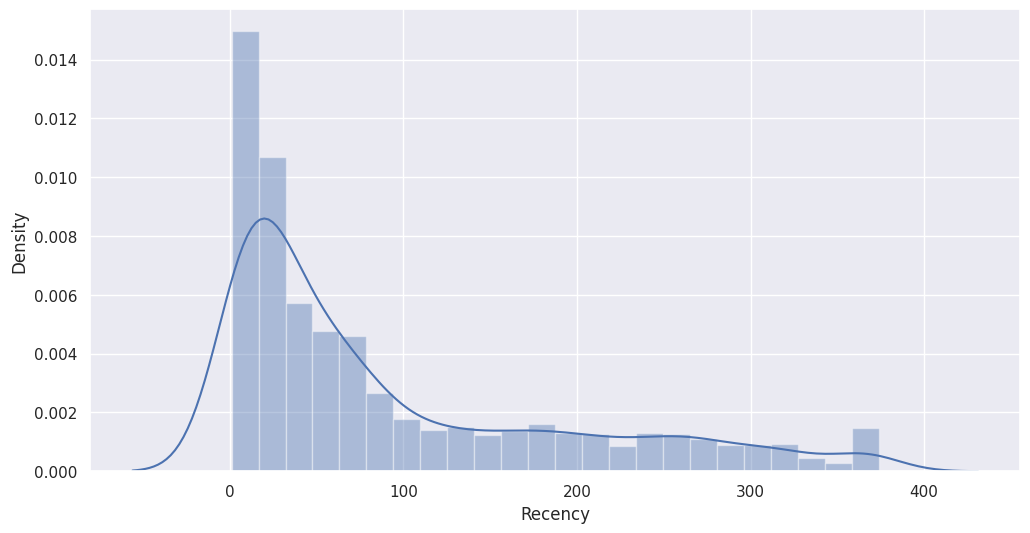

In [ ]:
# Distribution of Recency
x = rfm_df['Recency']
plt.figure(figsize=(12,6))
sns.distplot(x)

In [ ]:
# Let us check the stats for Frequency
rfm_df['Frequency'].describe()

count    3921.000000
mean       89.065800
std       214.022733
min         1.000000
25%        17.000000
50%        40.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

<Axes: xlabel='Frequency', ylabel='Density'>

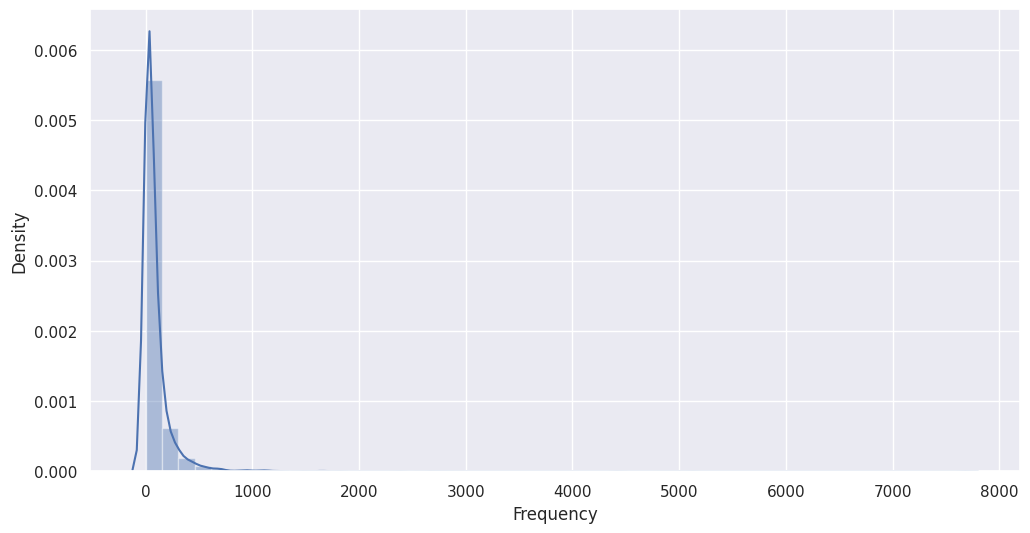

In [ ]:
# Distribution of Frequency
x = rfm_df['Frequency']
plt.figure(figsize=(12,6))
sns.distplot(x)

In [ ]:
# Let us check the stats for Monetary
rfm_df['Monetary'].describe()

count      3921.000000
mean       1857.950687
std        7477.736186
min           0.000000
25%         298.110000
50%         644.300000
75%        1570.810000
max      259657.300000
Name: Monetary, dtype: float64

<Axes: xlabel='Monetary', ylabel='Density'>

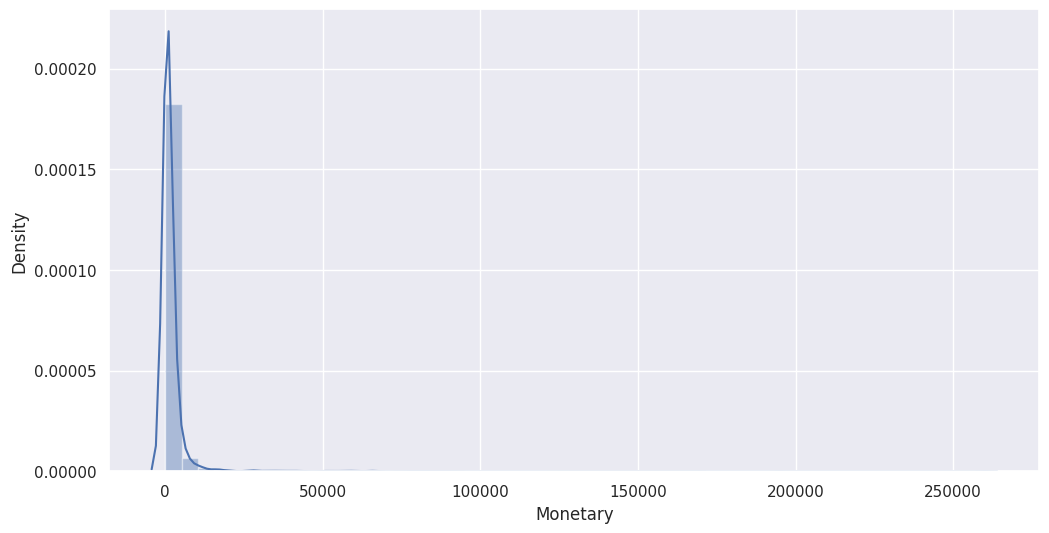

In [ ]:
# Distribution of Monetary
x = rfm_df['Monetary']
plt.figure(figsize=(12,6))
sns.distplot(x)

**Calculating RFM scores for each column based on quantiles.**

In [ ]:
# Define quantiles (e.g., quartiles)
quantiles = [0.25, 0.5, 0.75]

# Calculate quantile values for each column
quantile_values = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile(quantiles)

# Use quantile_values directly, no need for conversion to a dictionary
def calculate_r_score(x, column, quantiles):
    if x <= quantiles[column][0.25]:
        return 1
    elif x <= quantiles[column][0.50]:
        return 2
    elif x <= quantiles[column][0.75]:
        return 3
    else:
        return 4

def calculate_fnm_score(x, column, quantiles):
    if x <= quantiles[column][0.25]:
        return 4
    elif x <= quantiles[column][0.50]:
        return 3
    elif x <= quantiles[column][0.75]:
        return 2
    else:
        return 1

rfm_df['R_Score'] = rfm_df['Recency'].apply(calculate_r_score, args=('Recency', quantile_values))
rfm_df['F_Score'] = rfm_df['Frequency'].apply(calculate_fnm_score, args=('Frequency', quantile_values))
rfm_df['M_Score'] = rfm_df['Monetary'].apply(calculate_fnm_score, args=('Monetary', quantile_values))

rfm_df['RFM_Combined'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFM_Combined'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFM_Score'] = rfm_df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# Display the DataFrame with RFMGroup and RFMScore columns
rfm_df.head()

Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
CustomerID                                                            
12346.0         326          1  77183.60        4        4        1   
12747.0           2        103   4196.01        1        1        1   
12748.0           1       4413  33053.19        1        1        1   
12749.0           4        199   4090.88        1        1        1   
12820.0           3         59    942.34        1        2        2   

           RFM_Combined  RFM_Score  
CustomerID                          
12346.0             441          9  
12747.0             111          3  
12748.0             111          3  
12749.0             111          3  
12820.0             122          5

In [ ]:
# Define a function to handle negative and zero values
def handle_non_positive(num):
    return max(num, 1)

# Apply the function to Recency and Monetary columns
rfm_df['Recency'] = rfm_df['Recency'].apply(handle_non_positive)
rfm_df['Monetary'] = rfm_df['Monetary'].apply(handle_non_positive)

# Perform Log transformation to normalize the data
log_transformed_data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

# Display the log-transformed data
print(log_transformed_data)


            Recency  Frequency  Monetary
CustomerID                              
12346.0       5.787      0.000    11.254
12747.0       0.693      4.635     8.342
12748.0       0.000      8.392    10.406
12749.0       1.386      5.293     8.317
12820.0       1.099      4.078     6.848
...             ...        ...       ...
18280.0       5.628      2.303     5.196
18281.0       5.198      1.946     4.392
18282.0       2.079      2.485     5.182
18283.0       1.386      6.581     7.623
18287.0       3.761      4.248     7.516

[3921 rows x 3 columns]


<Axes: xlabel='Recency', ylabel='Density'>

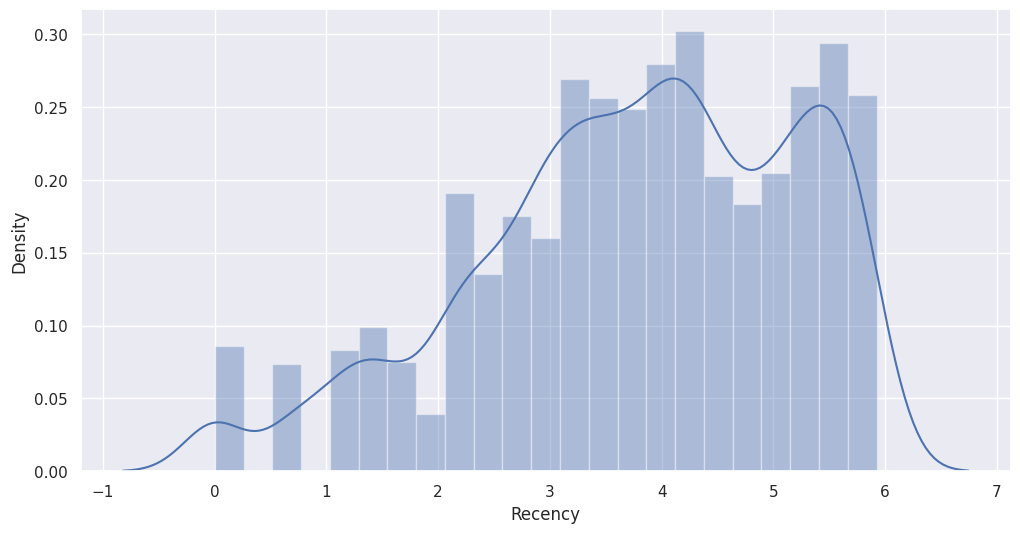

In [ ]:
# Data distribution after data normalization for Recency
recency_plot = log_transformed_data['Recency']
plt.figure(figsize=(12,6))
sns.distplot(recency_plot)

<Axes: xlabel='Frequency', ylabel='Density'>

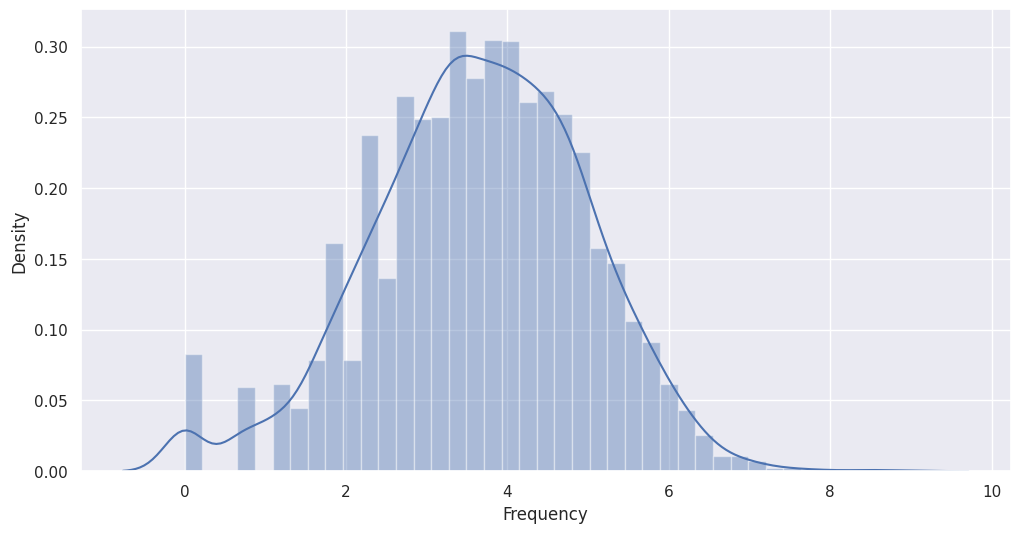

In [ ]:
# Data distribution after data normalization for Frequency
freq_plot = log_transformed_data['Frequency']
plt.figure(figsize=(12,6))
sns.distplot(freq_plot)

<Axes: xlabel='Monetary', ylabel='Density'>

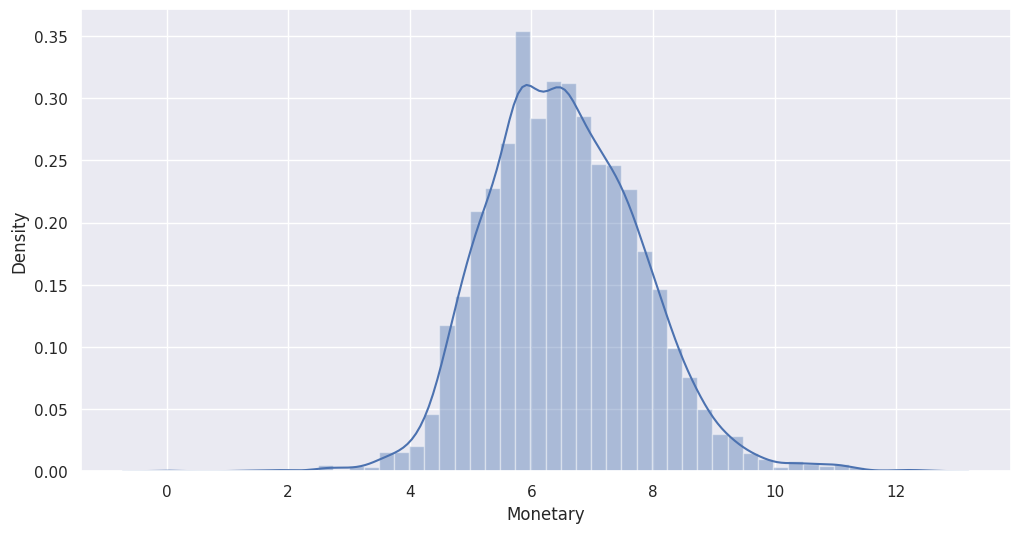

In [ ]:
# Data distribution after data normalization for Monetary
monetary_plot = log_transformed_data['Monetary']
plt.figure(figsize=(12,6))
sns.distplot(monetary_plot)

In [ ]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [ ]:
feature_vector = ['Recency_log','Frequency_log','Monetary_log']
X = rfm_df[feature_vector].values
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

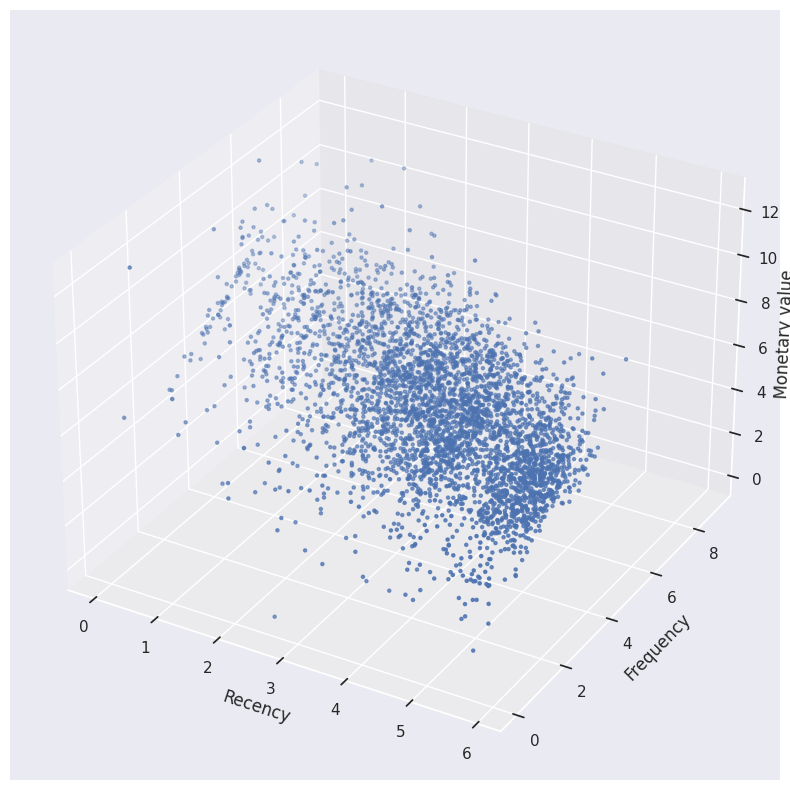

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111,projection='3d')
xs=rfm_df.Recency_log
ys=rfm_df.Frequency_log
zs=rfm_df.Monetary_log
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value', labelpad=0)
plt.show()

### **Applying Silhouette score on Recency and Monetary**

In [ ]:
import sklearn.metrics as metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

def silhouette_score_for_k_means(features, n_clusters):
    """
    Computes the silhouette score for k-means clustering on the given features.

    Args:
        features: The features to cluster.
        n_clusters: The number of clusters to use.

    Returns:
        The silhouette score for k-means clustering on the given features.
    """
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(features)
    score = metrics.silhouette_score(features, preds)
    return score


rec_mon_features = ['Recency_log','Monetary_log']
X_rec_mon_features = rfm_df[rec_mon_features].values

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
silhouette_scores = []
for n_clusters in range_n_clusters:
    silhouette_scores.append(silhouette_score_for_k_means(X_rec_mon_features, n_clusters))

score_df = pd.DataFrame({"Number of clusters": range_n_clusters, "Silhouette score": silhouette_scores})
score_df.head(None)

Number of clusters  Silhouette score
0                    2          0.423525
1                    3          0.353523
2                    4          0.371147
3                    5          0.337507
4                    6          0.346860
5                    7          0.338016
6                    8          0.330887
7                    9          0.343898
8                   10          0.344790
9                   11          0.334774
10                  12          0.339698
11                  13          0.339056
12                  14          0.335887
13                  15          0.335229

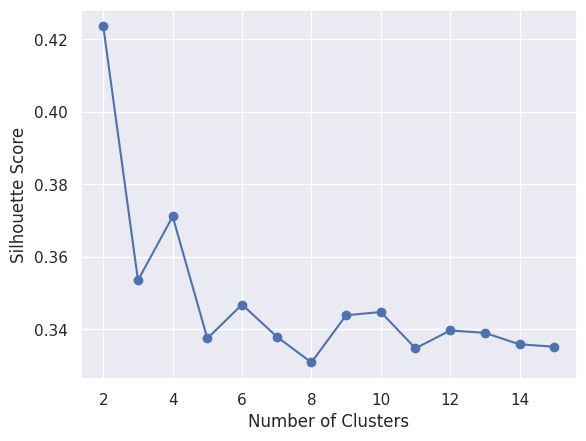

In [ ]:
plt.plot(range(2,16), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

From here it looks like 2 clusters will be suitable for clustering based on Recency and Monetary.

### **Applying Elbow Method on Recency and Monetary**

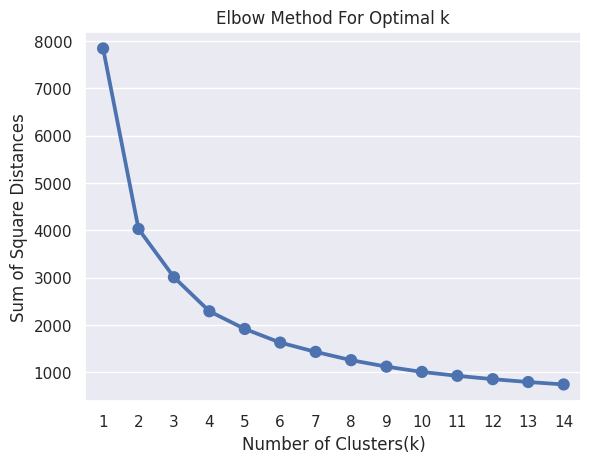

In [ ]:
"""
This code performs the elbow method to find the optimal number of clusters for k-means clustering.

The `r_m_features` variable is a list of two features: `Recency_log` and `Monetary_log`. These features are used to cluster the customers in the dataset.

The `Recency_log` feature is the number of days since the customer's most recent purchase. The `Monetary_log` feature is the total amount of money that
the customer has spent in the past 12 months.

The code first scales the features using the `StandardScaler` class. This is done to ensure that the features have the same scale, which can improve
the performance of the k-means algorithm.

The code then performs k-means clustering on the scaled features for a range of number of clusters. The sum of squared distances for each cluster is
calculated and stored in the `sum_of_sq_dist` dictionary.

The elbow method is then used to find the optimal number of clusters. The elbow method works by plotting the sum of squared distances for each cluster
against the number of clusters. The optimal number of clusters is the point at which the curve starts to bend sharply.

Finally, the code plots the sum of squared distances for each cluster against the number of clusters.
"""




# Defining the features to use
r_m_features = ['Recency_log','Monetary_log']

# Scale the features
X_r_m_features = rfm_df[r_m_features].values
r_m_scaled = preprocessing.StandardScaler()
X_r_m = r_m_scaled.fit_transform(X_r_m_features)
X = X_r_m

from sklearn.cluster import KMeans

# Create a dictionary to store the sum of squared distances for each cluster
sum_of_sq_dist = {}

# Iterate over a range of number of clusters
for k in range(1,15):
    km = KMeans(n_clusters = k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

# Plot the sum of squared distances for each cluster against the number of clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the elbow method, the I think that 2 number of clusters will be suitable.

In [ ]:
"""
This code performs k-means clustering on the data in the `X` variable.

The `kmeans` variable is an instance of the `KMeans` class. The `n_clusters` parameter is set to 2, which means that the
data will be clustered into 2 groups.

The `fit()` method is used to fit the k-means model to the data. The `predict()` method is then used to predict the cluster labels for each data point.

The `y_kmeans` variable stores the cluster labels for each data point.
"""


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)    # Create a k-means model with 2 clusters
kmeans.fit(X)                    # Fit the model to the data
y_kmeans= kmeans.predict(X)      # Predict the cluster labels for each data point

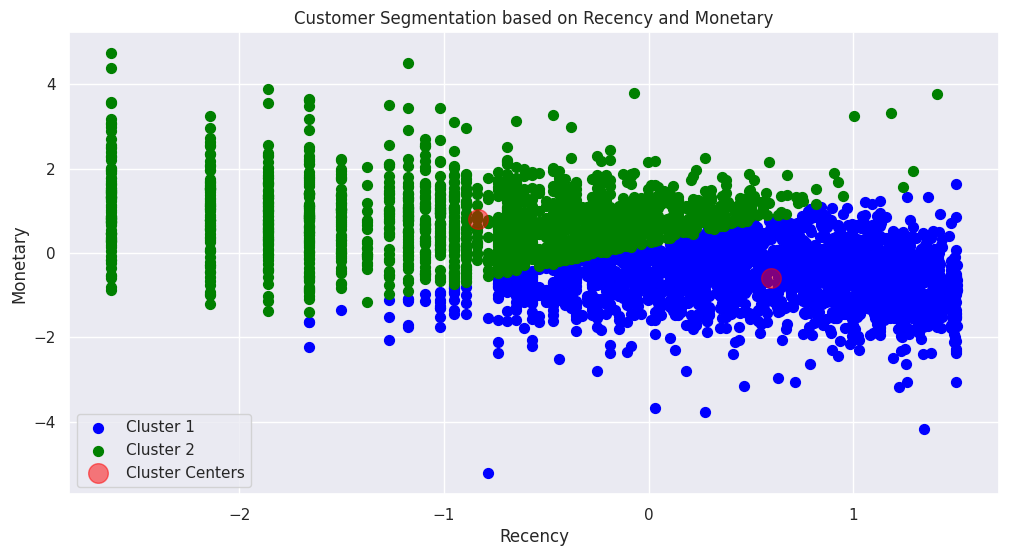

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Customer Segmentation based on Recency and Monetary')

# Scatter plot for each category with labels
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c='blue', s=50, label='Cluster 1', cmap='spring')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c='green', s=50, label='Cluster 2', cmap='spring')

plt.xlabel('Recency')
plt.ylabel('Monetary')

# Scatter plot for cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, label='Cluster Centers')

# Add a legend
plt.legend()

plt.show()


**Observations**
- **Cluster 2**: Customers in this cluster have lower recency values, & have made purchases more recently. Also, their Monetary value is high compared to Cluster 1 customers. They may be considered more engaged or active customers.
- **Cluster 1**: Customers in this cluster have higher recency values, & have not made purchases for a longer time. Also, their Monetary value is less compared to the Cluster 1 customers. They may be considered less engaged or dormant customers.

#### **Applying DBSCAN on Recency & Monetary**

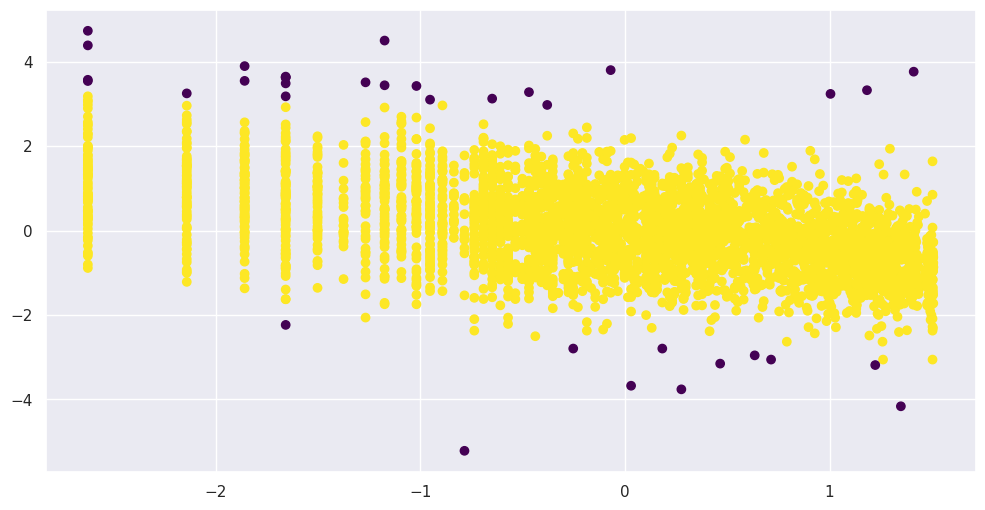

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(12,6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')


Both K-Means and DBSCAN suggest 2 clusters indicates that there are two distinct patterns in the data based on Recency and Monetary.

### **Applying Silhouette Score on Frequency & Monetary**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn import preprocessing

features_freq_mon = ['Frequency_log', 'Monetary_log']
X_features_freq_mon = rfm_df[features_freq_mon].values
scaler_freq_mon = preprocessing.StandardScaler()
X_freq_mon = scaler_freq_mon.fit_transform(X_features_freq_mon)
X = X_freq_mon

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

scores_df = pd.DataFrame(columns=['Number of clusters', 'Silhouette score'])

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    scores_df = scores_df.append({'Number of clusters': n_clusters,
                                  'Silhouette score': score},
                                 ignore_index=True)

scores_df.head(None)

Number of clusters  Silhouette score
0                  2.0          0.477888
1                  3.0          0.406385
2                  4.0          0.369424
3                  5.0          0.339668
4                  6.0          0.358735
5                  7.0          0.342083
6                  8.0          0.349533
7                  9.0          0.338163
8                 10.0          0.355600
9                 11.0          0.364311
10                12.0          0.353740
11                13.0          0.357922
12                14.0          0.366883
13                15.0          0.357554

In [ ]:
score = scores_df['Silhouette score'].values

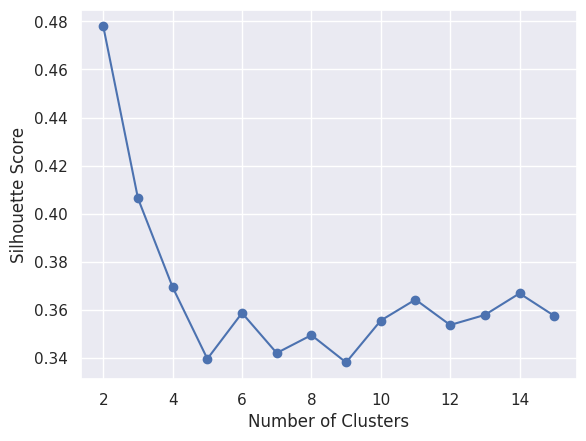

In [ ]:
plt.plot(range(2,16),score, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

When we move from 2 to 3 clusters, the silhouette score decreases slightly, indicating that the separation between clusters is slightly less effective. However, the score is still relatively high, suggesting that 3 clusters provide a good balance between cohesion and separation.

So, in the case of Frequency and Monetary we will be taking 3 clusters as it provides better interpretability compared to when we take 2 clusters.

### **Applying Elbow Method on Frequency & Monetary**

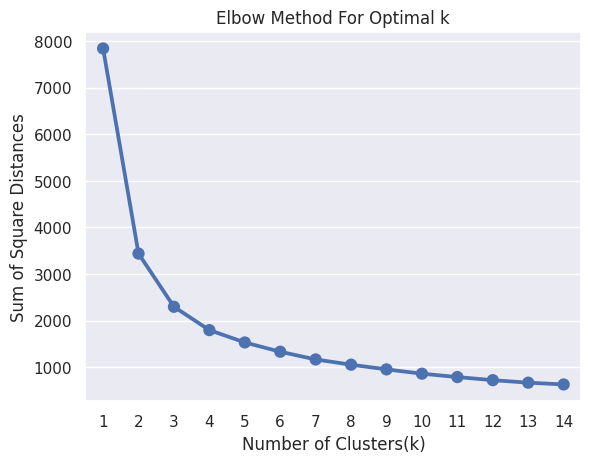

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the Elbow Method, I think we can take 3 as the number of clusters.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)       # Create a k-means model with 3 clusters
kmeans.fit(X)                       # Fit the model to the data
y_kmeans= kmeans.predict(X)         # Predict the cluster labels for each data point

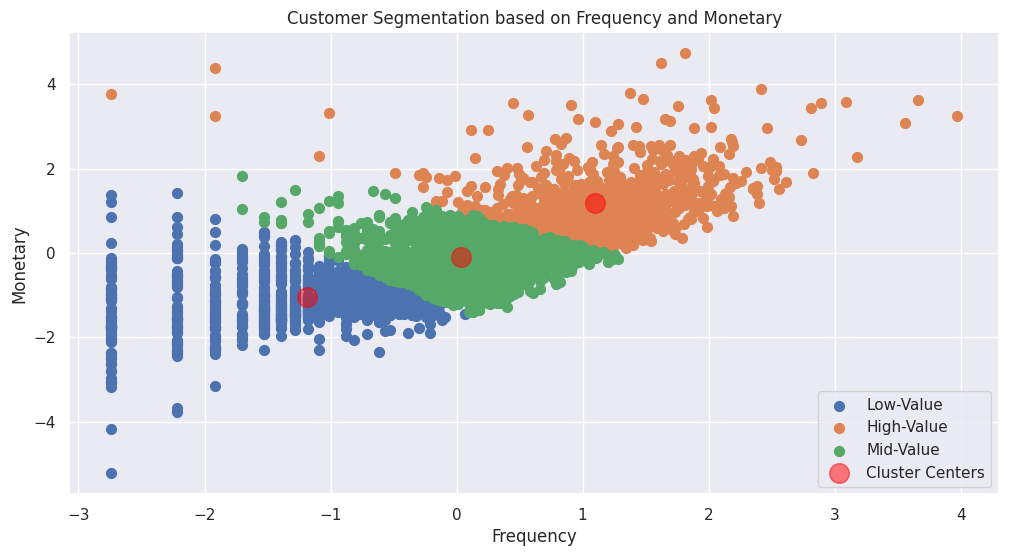

In [ ]:
# Define labels for the clusters
cluster_labels = ["Low-Value","High-Value","Mid-Value"]

# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(12, 6))
plt.title('Customer Segmentation based on Frequency and Monetary')

# Scatter plot for data points colored by cluster labels
for i, label in enumerate(cluster_labels):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=50, label=label)

# Add cluster centers as red points
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, label='Cluster Centers')

# Add labels for the x and y axes
plt.xlabel('Frequency')
plt.ylabel('Monetary')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


**Observations**
- **High-Value, Frequent Customers (Category 1)**: Customers in this cluster make both frequent purchases and high-value transactions. They are the most valuable customers to the business in terms of revenue.
- **Mid-Value, Moderate Frequency Customers (Category 2)**: Customers in this cluster make moderately frequent purchases, and their transactions are of moderate value. They contribute to the business but are not as high-value as Category 1.
- **Low-Value, Infrequent Customers (Category 3)**: Customers in this cluster make infrequent purchases, and their transactions are of lower value. They are occasional shoppers and may not contribute significantly to revenue.

### **Applying DBSCAN to Frequency & Monetary**

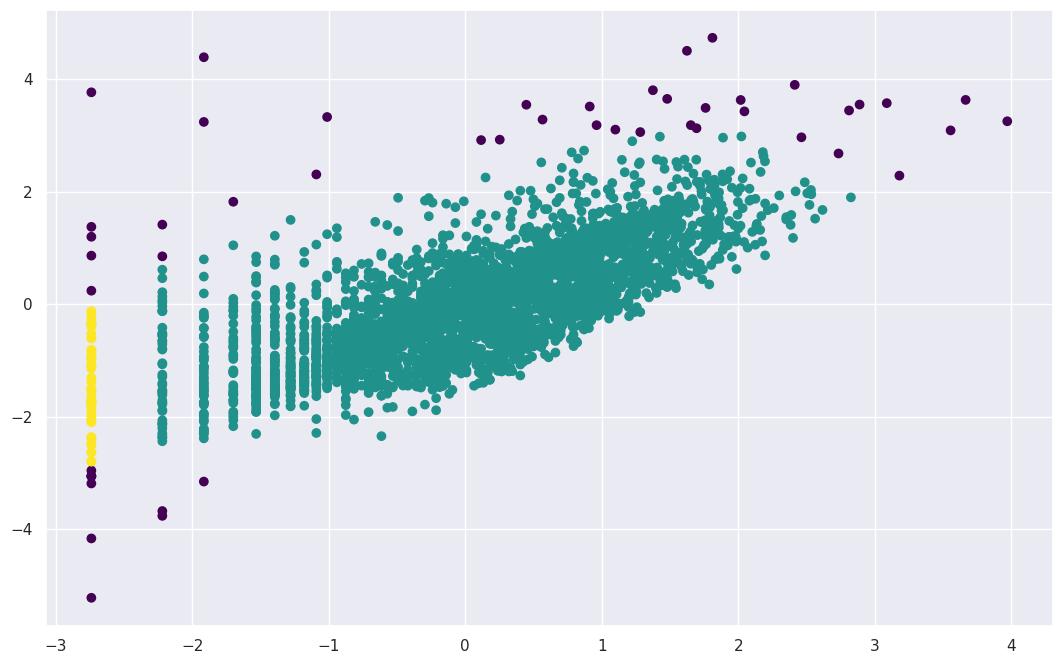

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap = 'viridis')

DBSCAN on frequency and monetary also shows 3 clusters. This suggests that there might be natural groupings or patterns in the data that are being captured by both K-Means and DBSCAN clustering algorithms.

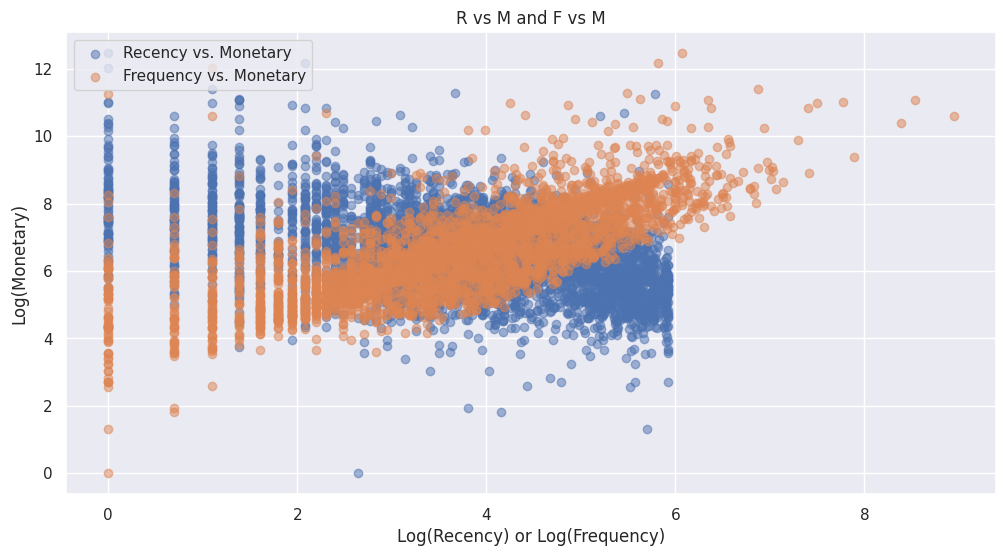

In [ ]:
# Create a figure and axis
plt.figure(figsize=(12, 6))
plt.title('R vs M and F vs M')

# Scatter plot for Recency vs. Monetary with legend
plt.scatter(rfm_df.Recency_log, rfm_df.Monetary_log, alpha=0.5, cmap='inferno', label='Recency vs. Monetary')

# Scatter plot for Frequency vs. Monetary with legend
plt.scatter(rfm_df.Frequency_log, rfm_df.Monetary_log, alpha=0.5, cmap='viridis', label='Frequency vs. Monetary')

# Add labels for the x and y axes
plt.xlabel('Log(Recency) or Log(Frequency)')
plt.ylabel('Log(Monetary)')

# Add a legend to distinguish the two scatter plots
plt.legend(loc='upper left')

# Display the plot
plt.show()


**Observations**
- Customers located towards the right on the x-axis (higher log-transformed Recency or Frequency) tend to be more recent or frequent shoppers, respectively.
- Customers located higher on the y-axis (higher log-transformed Monetary) tend to spend more.

### **Applying Silhouette Score on Recency, Frequency & Monetary**

In [ ]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.3953688863361336
For n_clusters = 3 The average silhouette_score is : 0.30422085824707806
For n_clusters = 4 The average silhouette_score is : 0.2988600830709475
For n_clusters = 5 The average silhouette_score is : 0.2801878386542659
For n_clusters = 6 The average silhouette_score is : 0.2747303454743935
For n_clusters = 7 The average silhouette_score is : 0.26299477554537626
For n_clusters = 8 The average silhouette_score is : 0.26072602810986983
For n_clusters = 9 The average silhouette_score is : 0.24912032959714586
For n_clusters = 10 The average silhouette_score is : 0.2581521029097245
For n_clusters = 11 The average silhouette_score is : 0.27000965367068946
For n_clusters = 12 The average silhouette_score is : 0.2590309267512706
For n_clusters = 13 The average silhouette_score is : 0.2626797068405787
For n_clusters = 14 The average silhouette_score is : 0.2606300144028408
For n_clusters = 15 The average silhouette_score is : 

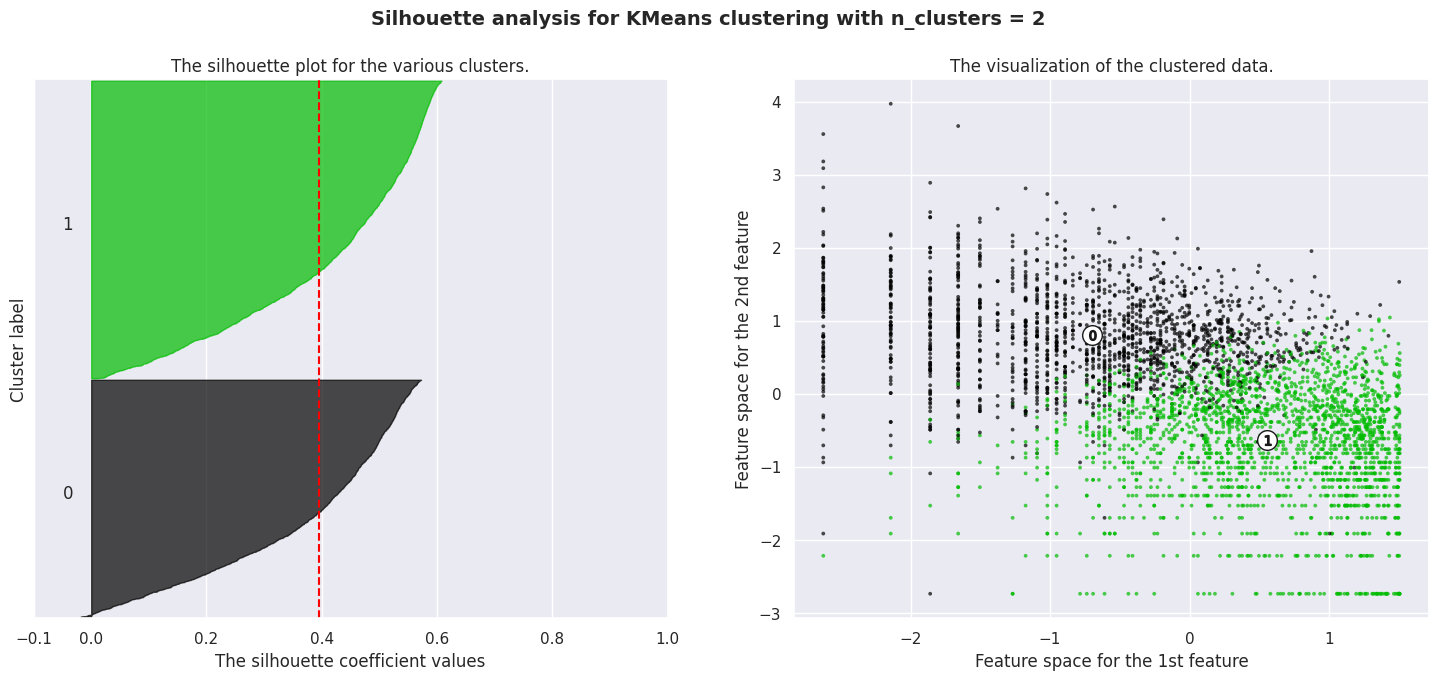

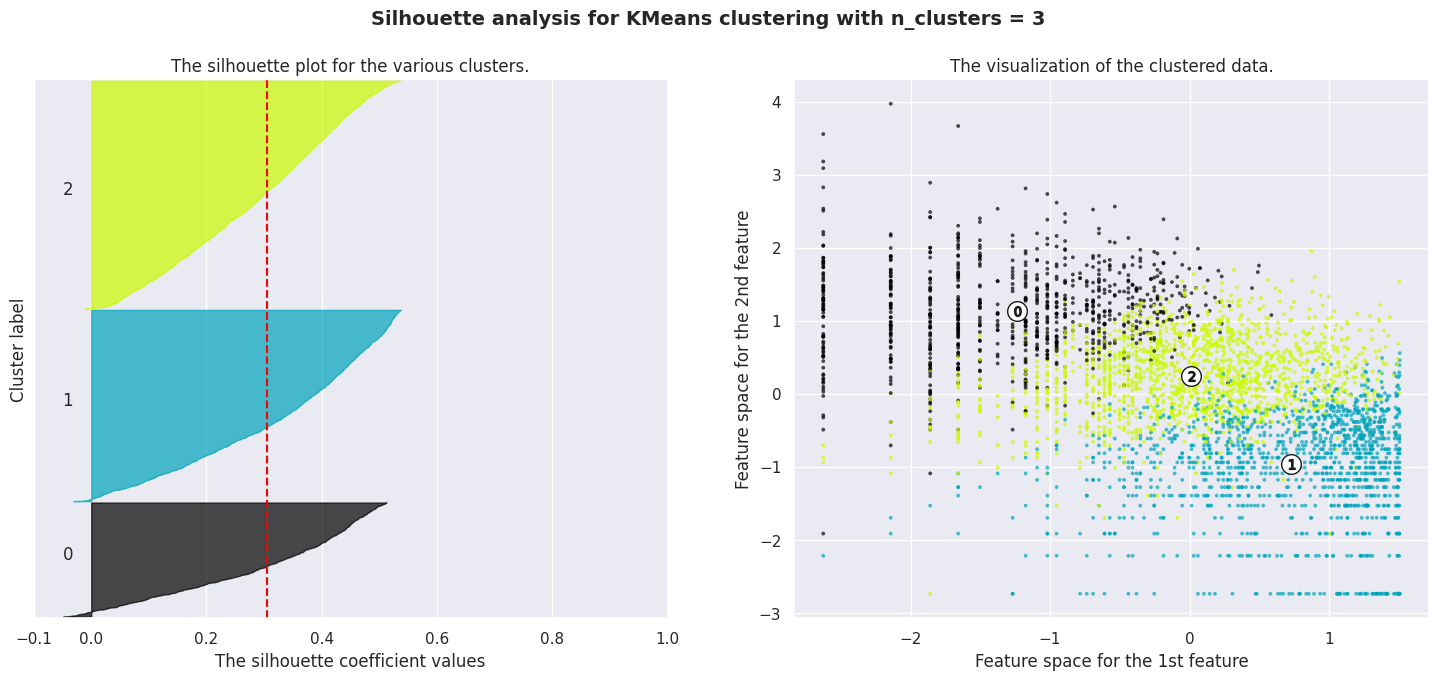

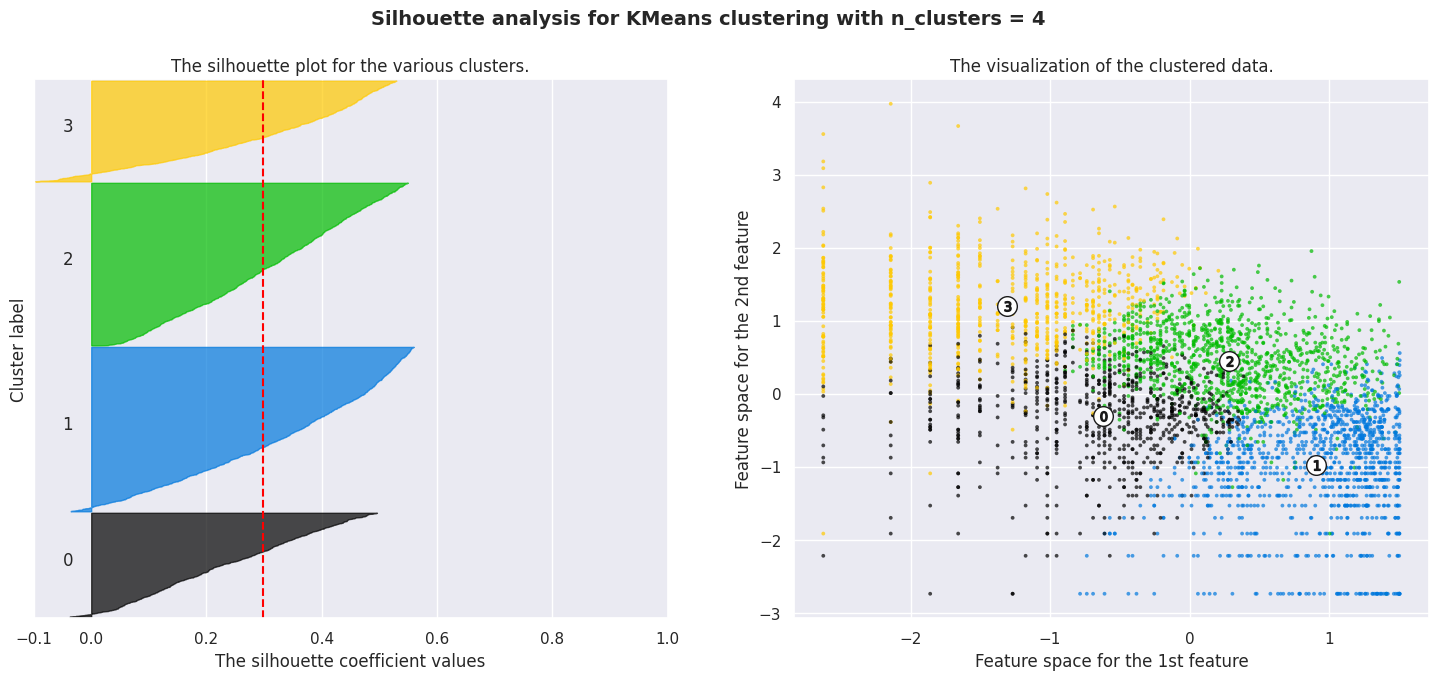

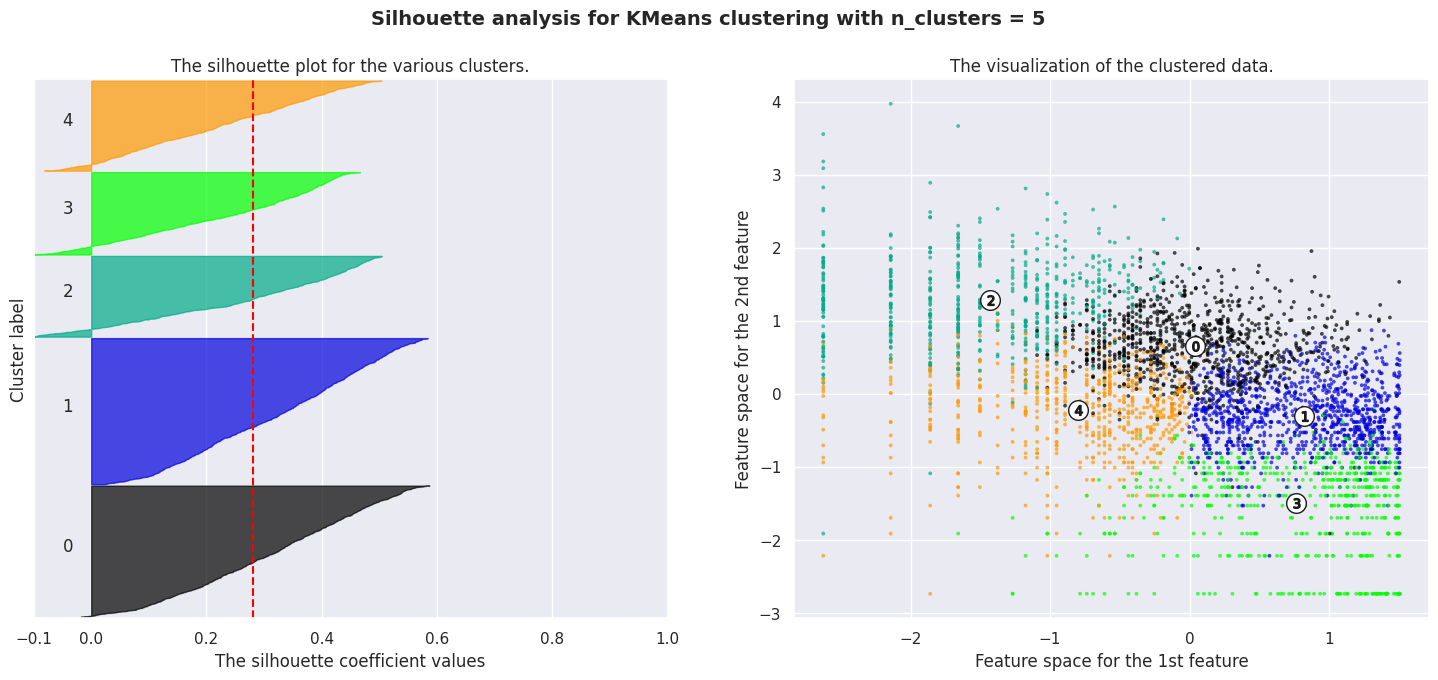

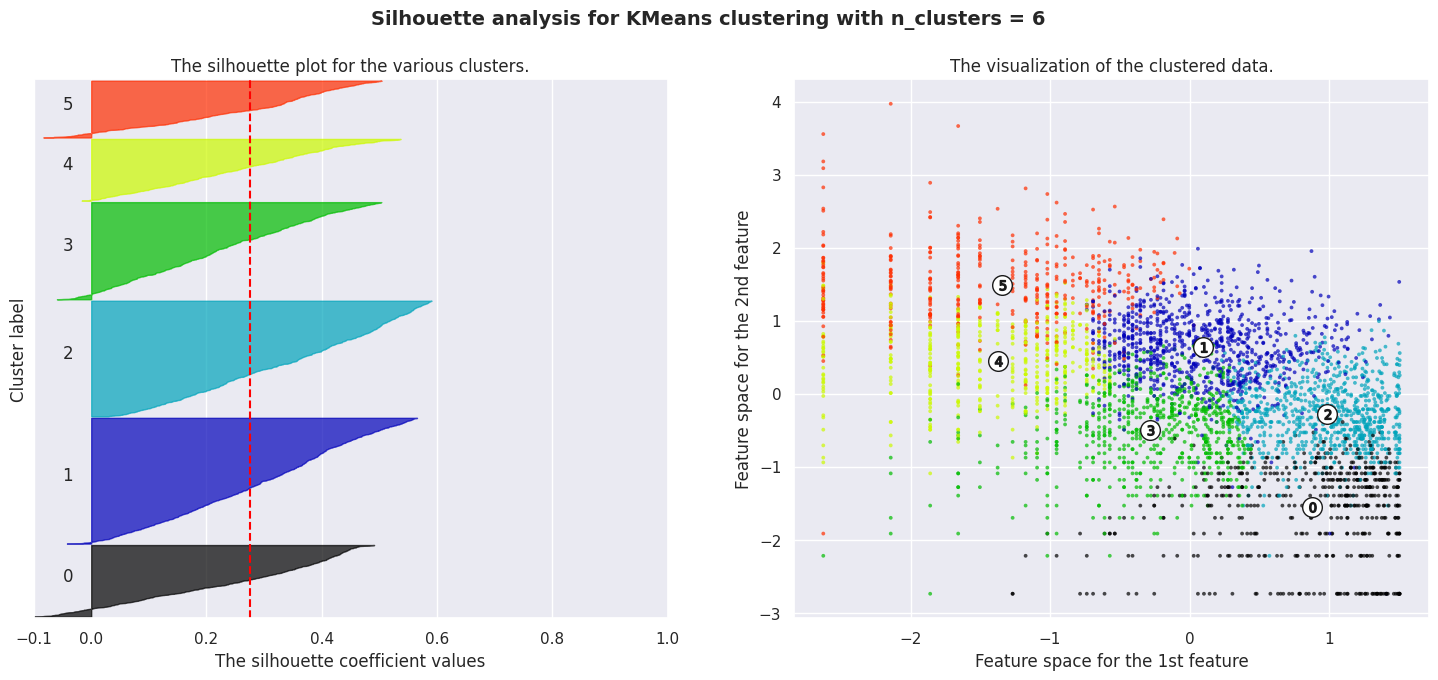

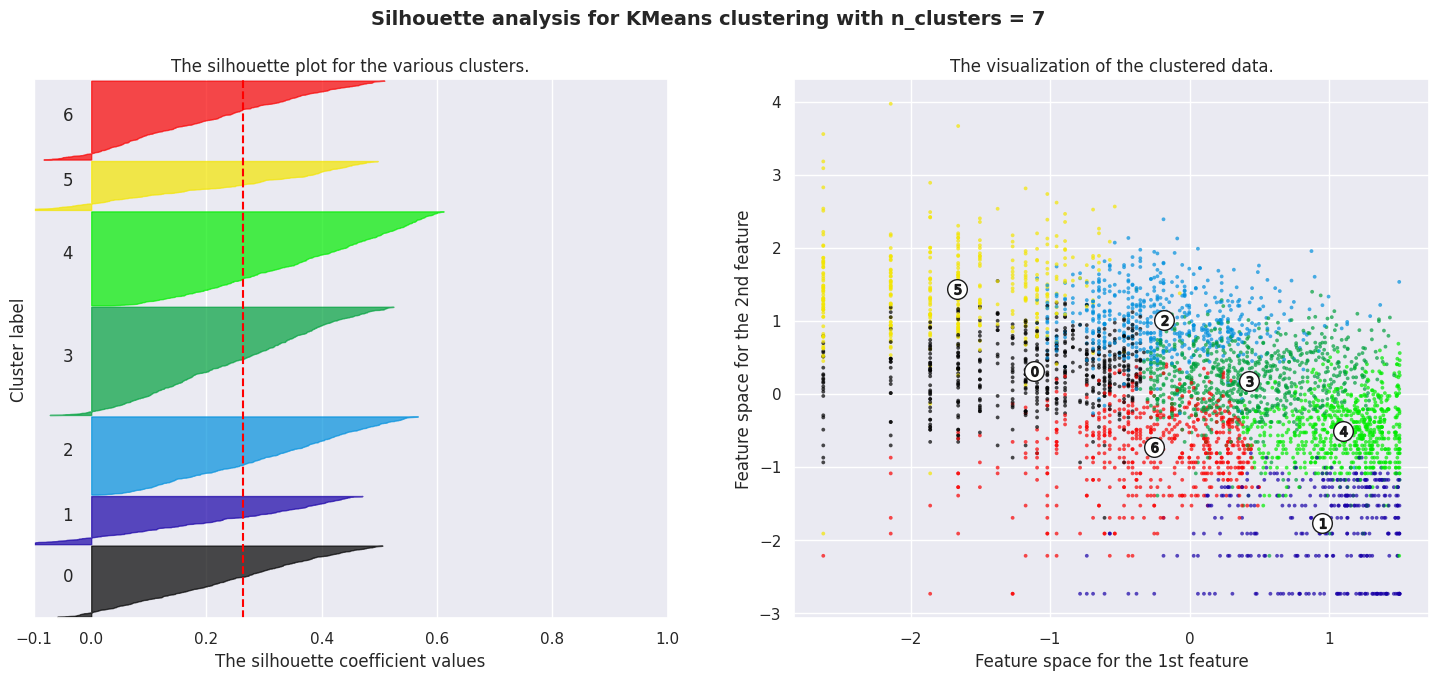

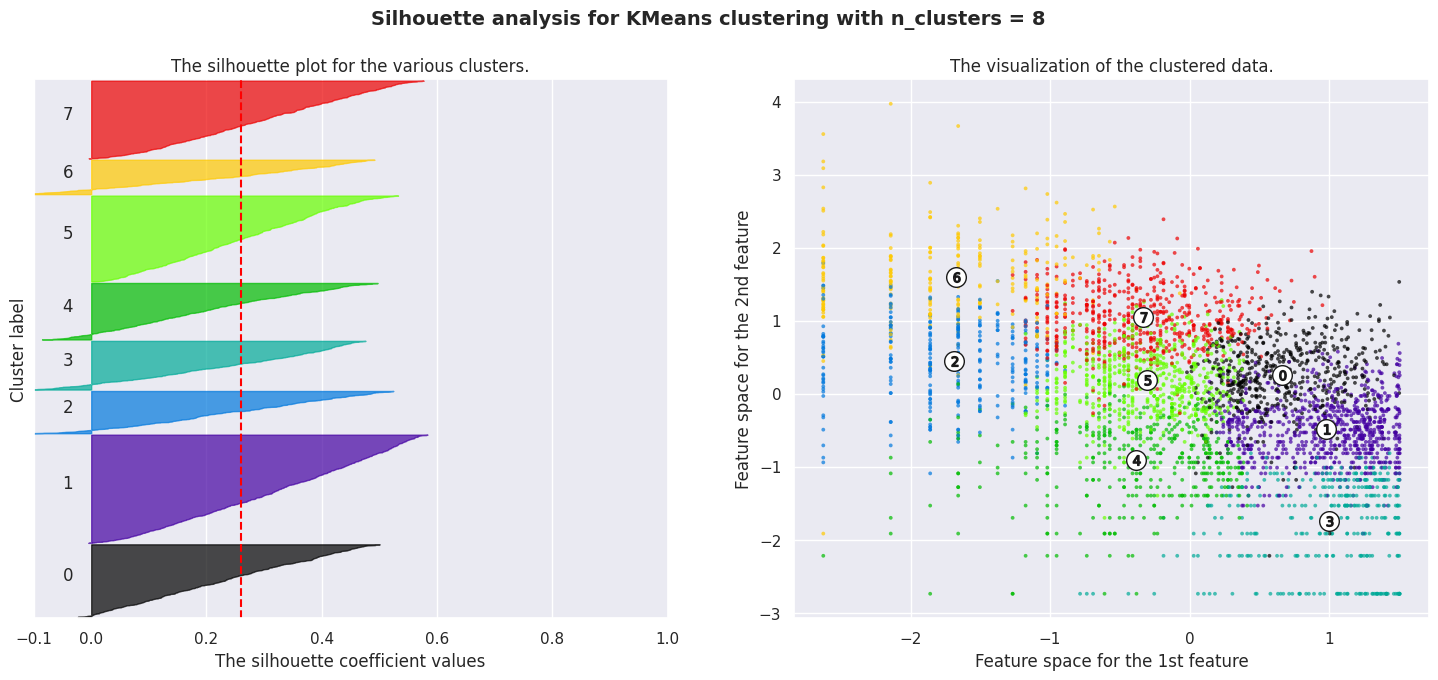

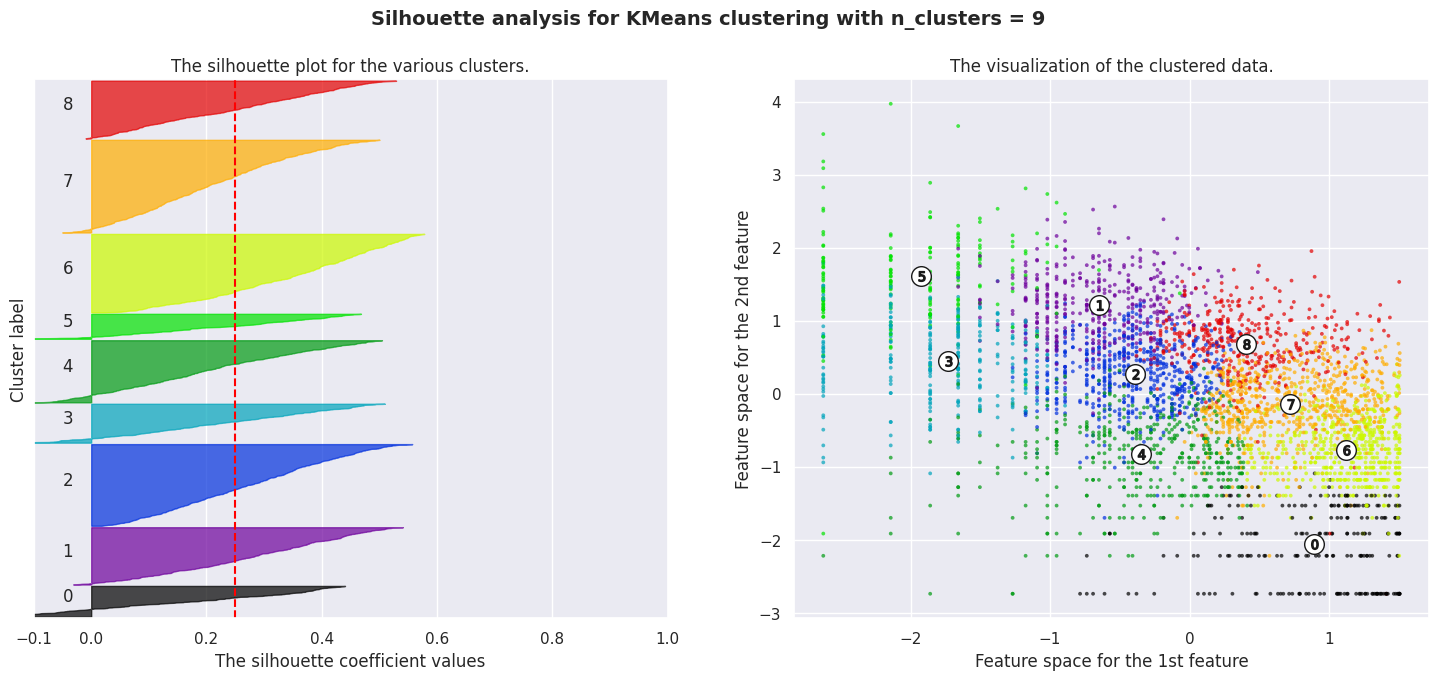

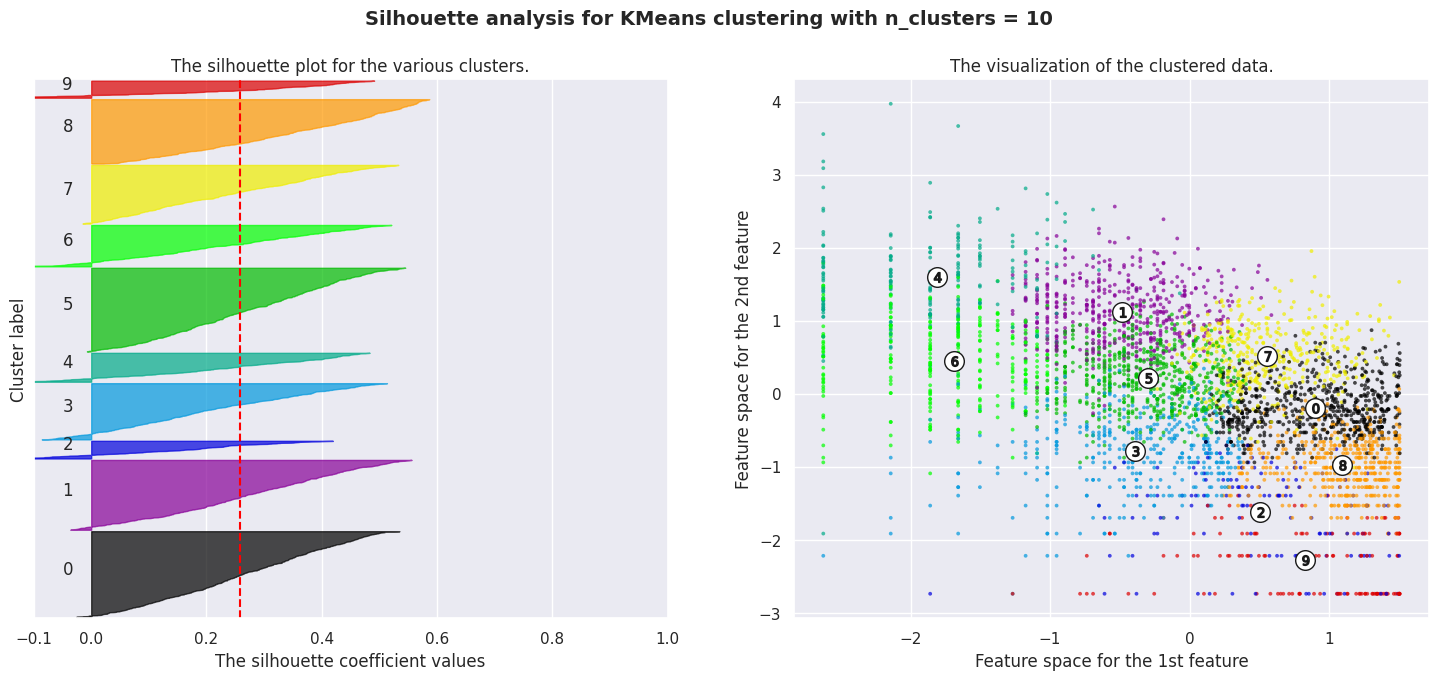

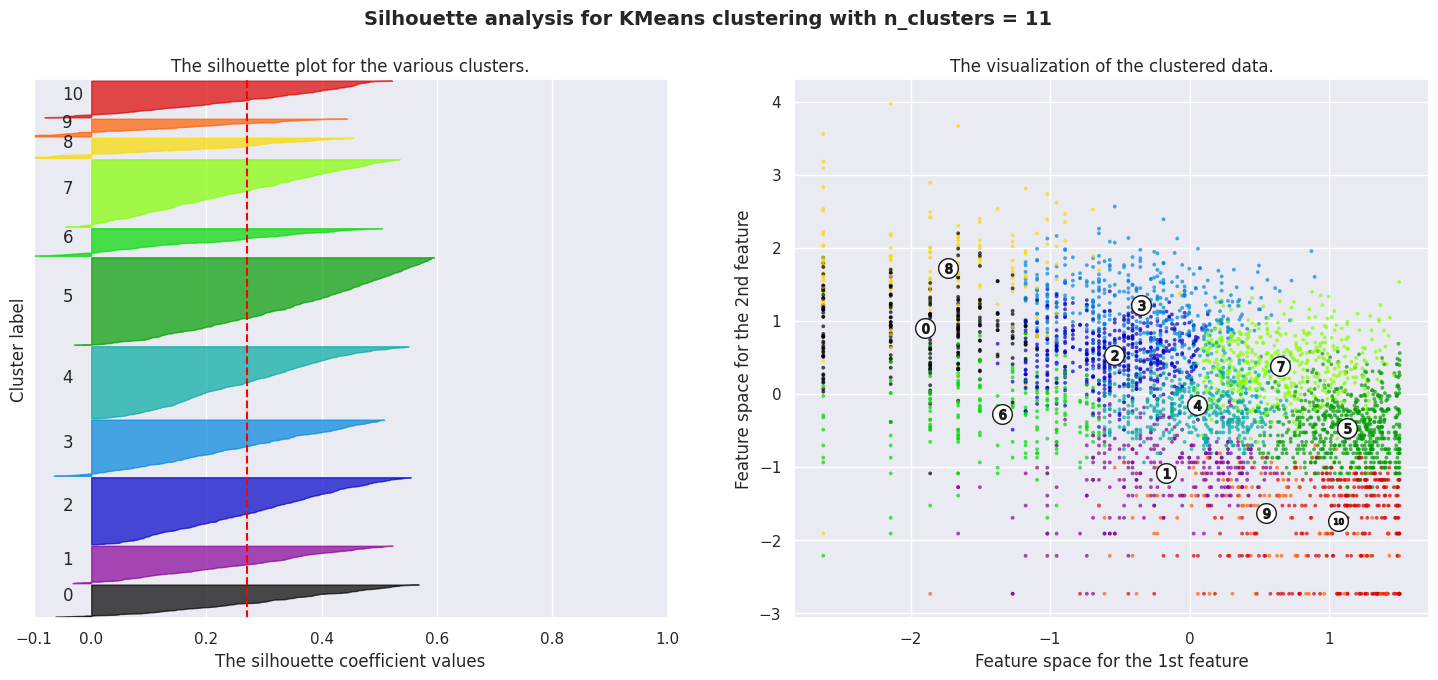

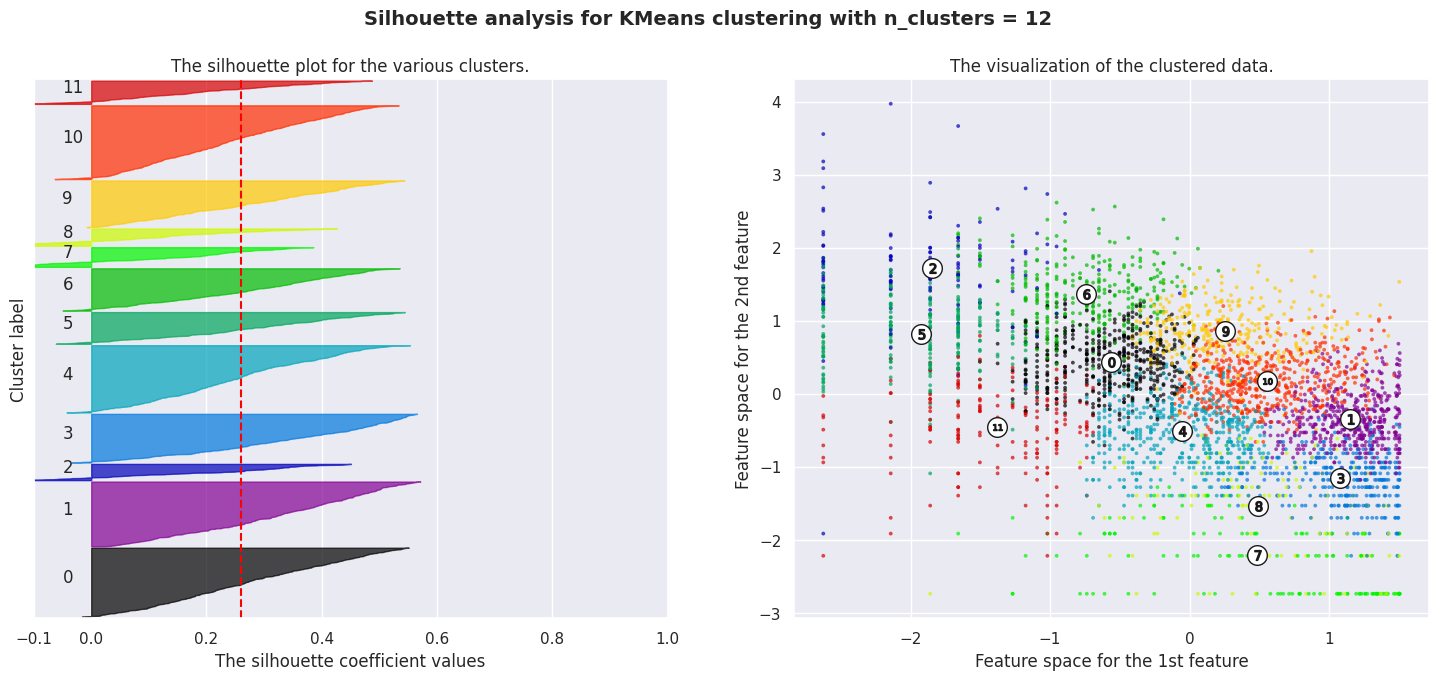

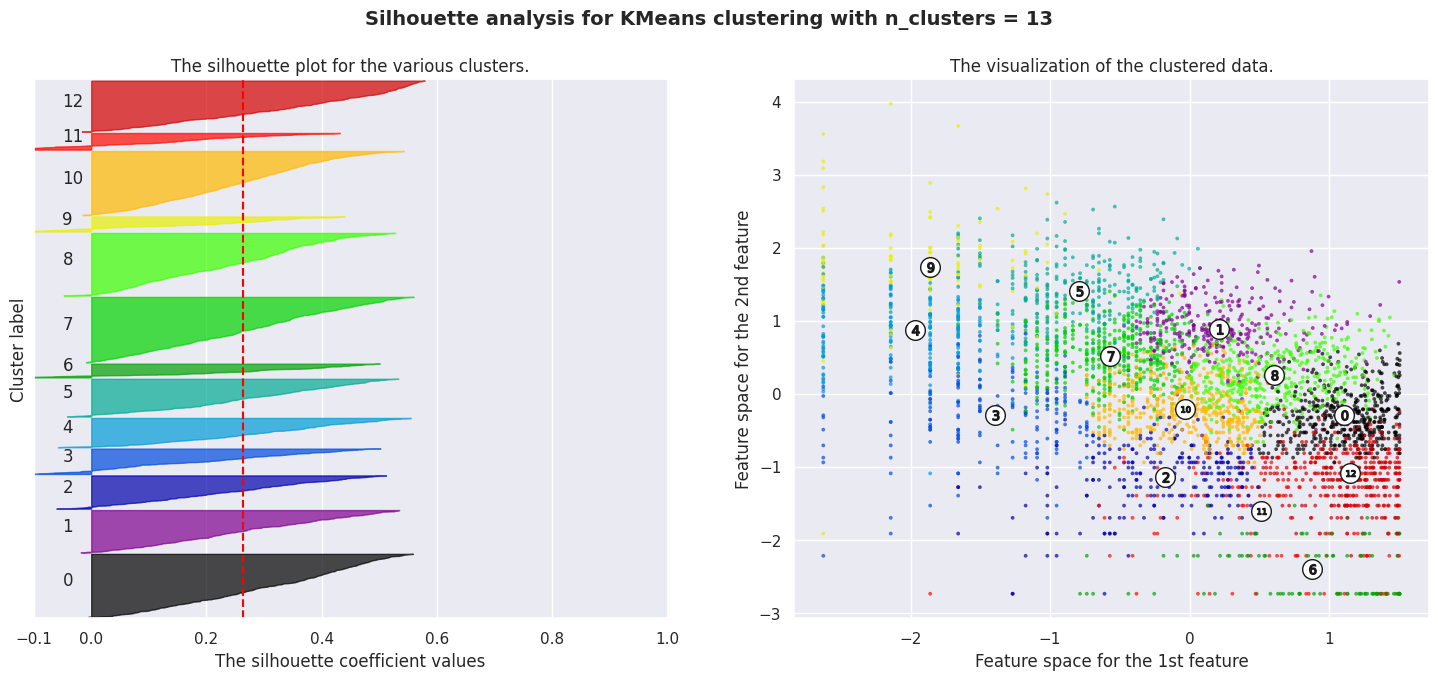

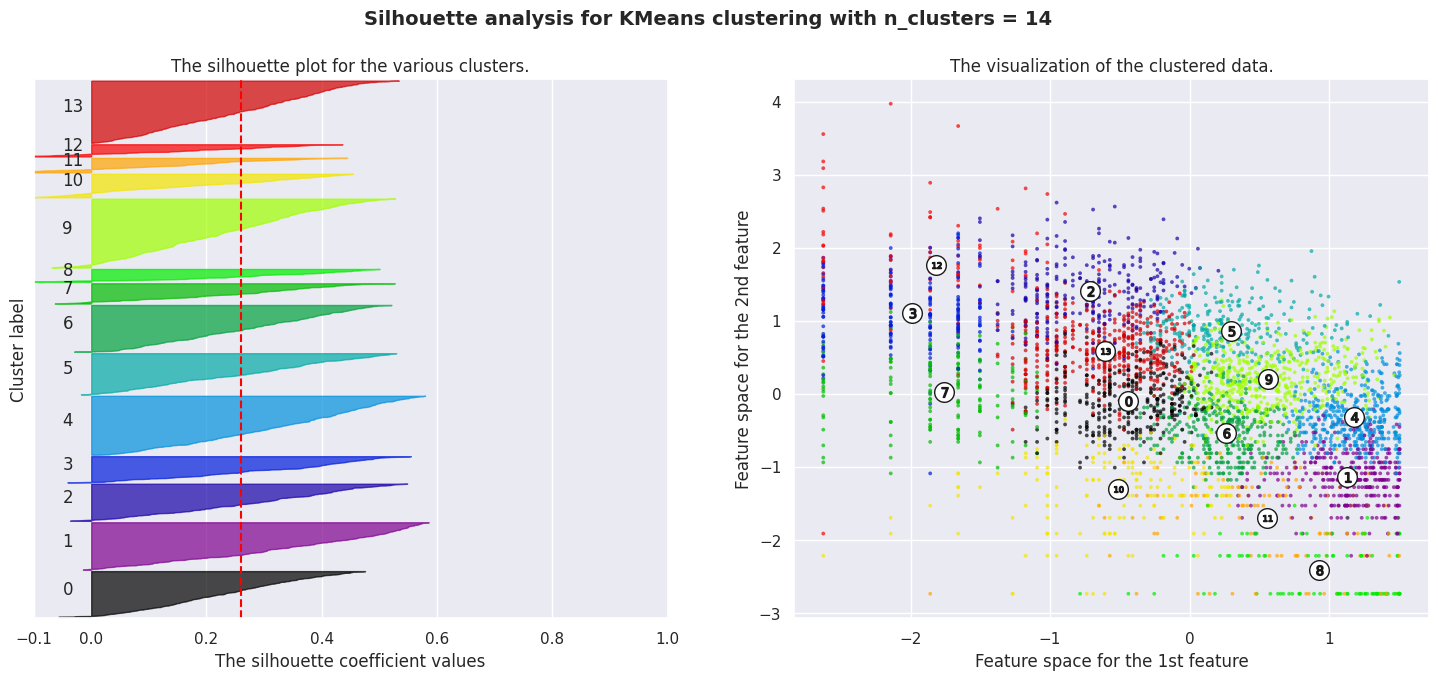

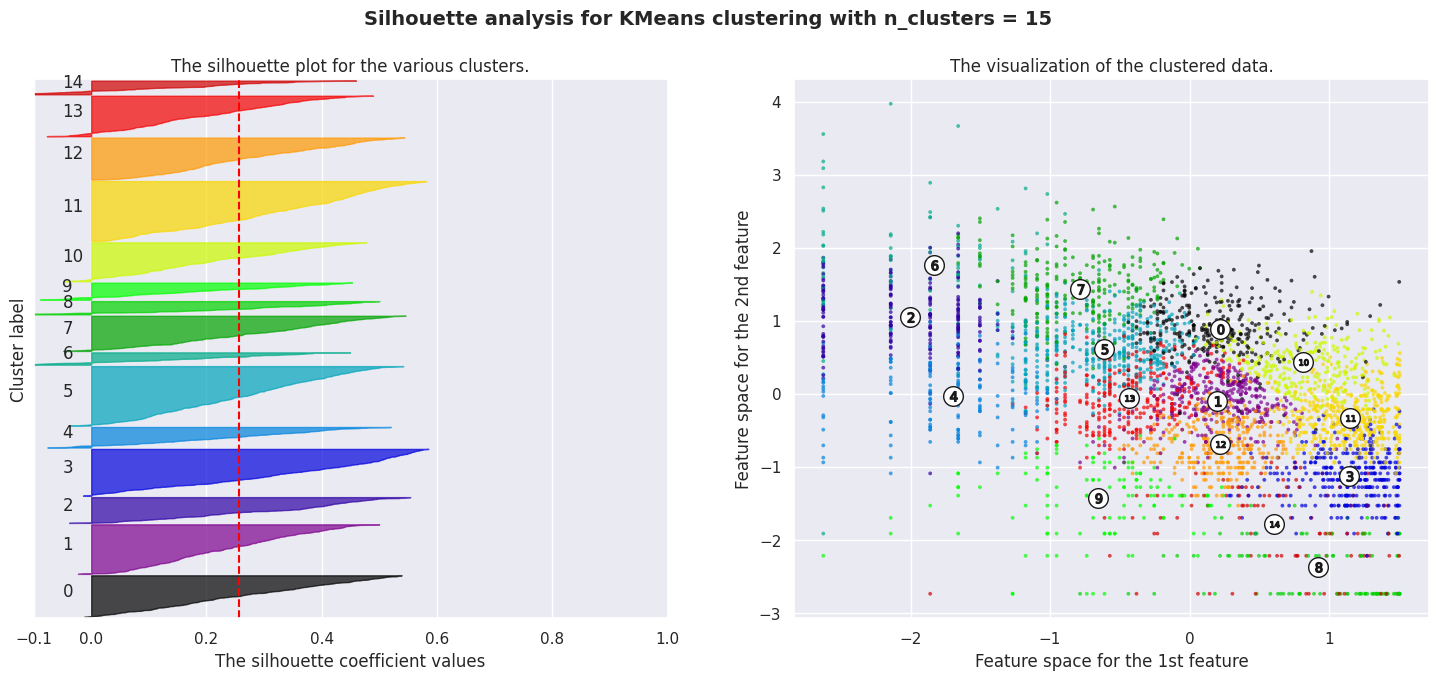

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Define a range of cluster numbers to try
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



- For 2 clusters, the silhouette score is 0.478, indicating a good separation between two clusters.
- For 3 clusters, the silhouette score is 0.406, which is slightly lower than for 2 clusters but still a strong score. This suggests that dividing the data into three clusters still results in well-separated groups.
- Dividing the data into 3 clusters helps identify three distinct groups of customers based on their RFM characteristics, which can be more actionable from a business perspective.

### **Applying Elbow Method on Recency ,Frequency and Monetary**

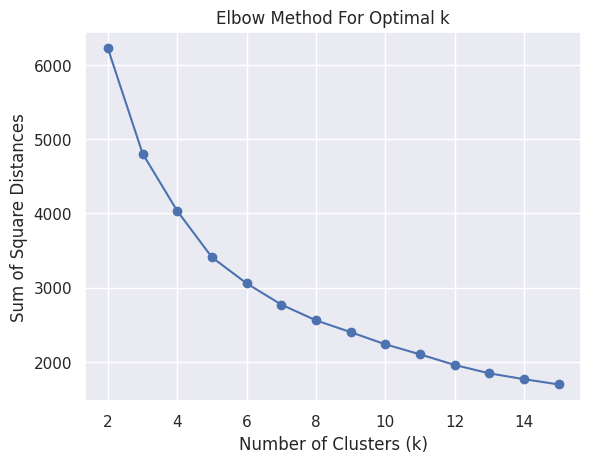

In [ ]:
from sklearn.cluster import KMeans

# Initialize a dictionary to store sum of square distances
sum_of_sq_distances = {}

# Define the range of clusters to consider
cluster_range = range(2, 16)

# Calculate sum of square distances for different numbers of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    kmeans.fit(X)
    sum_of_sq_distances[k] = kmeans.inertia_

# Plot the sum of square distances against the number of clusters
plt.plot(cluster_range, list(sum_of_sq_distances.values()), marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

It appears that the inertia continues to decrease beyond 3 clusters, but the rate of decrease becomes less significant with each additional cluster.
This suggests that choosing 3 clusters strikes a reasonable balance between explaining variance in the data and avoiding excessive complexity in the clustering solution.

In [ ]:
# Define the number of clusters for K-Means
n_clusters = 3
# Create a K-Means model with the specified number of clusters
kmeans = KMeans(n_clusters = n_clusters, random_state=1)
# Fit the K-Means model to the input data X
kmeans.fit(X)
# Predict cluster labels for each data point and assign them to the "cluster" column
rfm_df["cluster"] = kmeans.predict(X)

In [ ]:
# Group the data by cluster and calculate the mean values of Recency, Frequency, and Monetary
rfm_df.groupby(["cluster"])[['Recency','Frequency', 'Monetary']].mean()

Recency   Frequency     Monetary
cluster                                     
0        169.077525   14.883357   284.867654
1         67.707288   66.498208  1147.046220
2         12.373365  258.005945  5902.908859

Text(0, 0.5, 'Monetary')

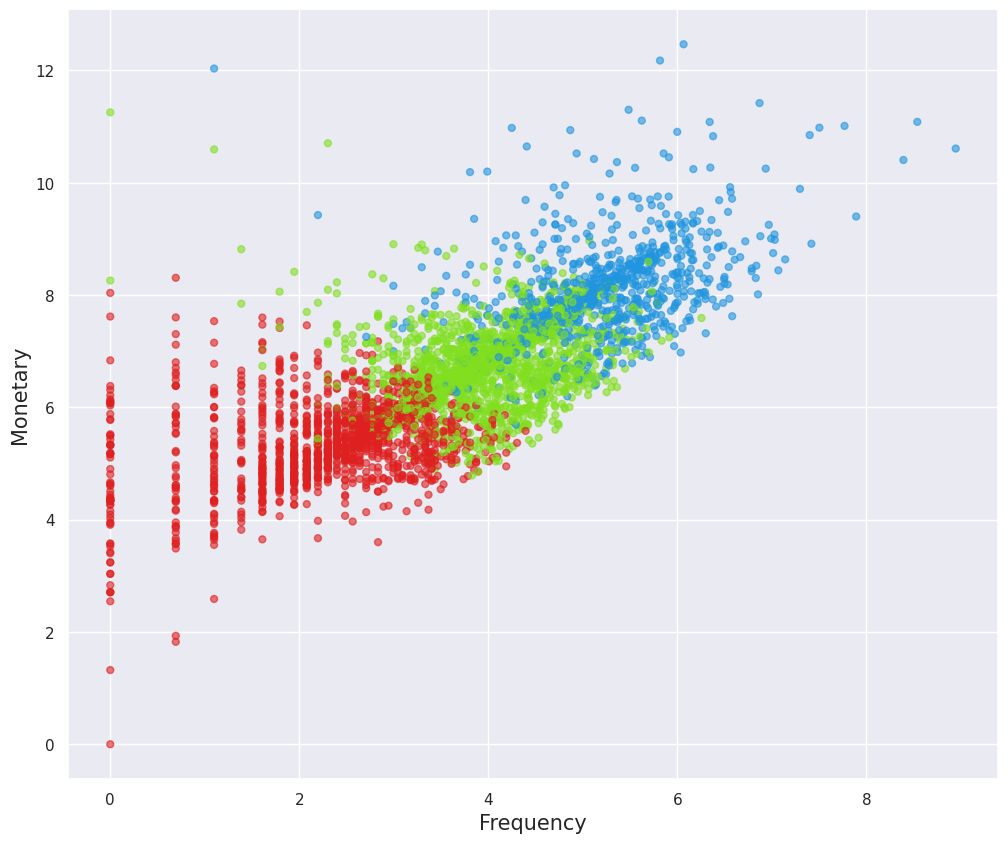

In [ ]:
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

# add to dataframe
rfm_df['cen_x'] = rfm_df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
rfm_df['cen_y'] = rfm_df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
rfm_df['c'] = rfm_df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

# Plot clusters
plt.figure(figsize=(12,10))
plt.scatter(rfm_df.Frequency_log, rfm_df.Monetary_log, c=rfm_df.c, alpha = 0.6, s=25)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)

We can see that customers are well separated using 3 clusters based on Recency, Frequency, & Monetary.It clearly shows that the Blue cluster is High Value customers, Green Cluster is Average Value Customers and Red Cluster is Low Value Customers. Let us visualize it in 3D to get a better understanding.


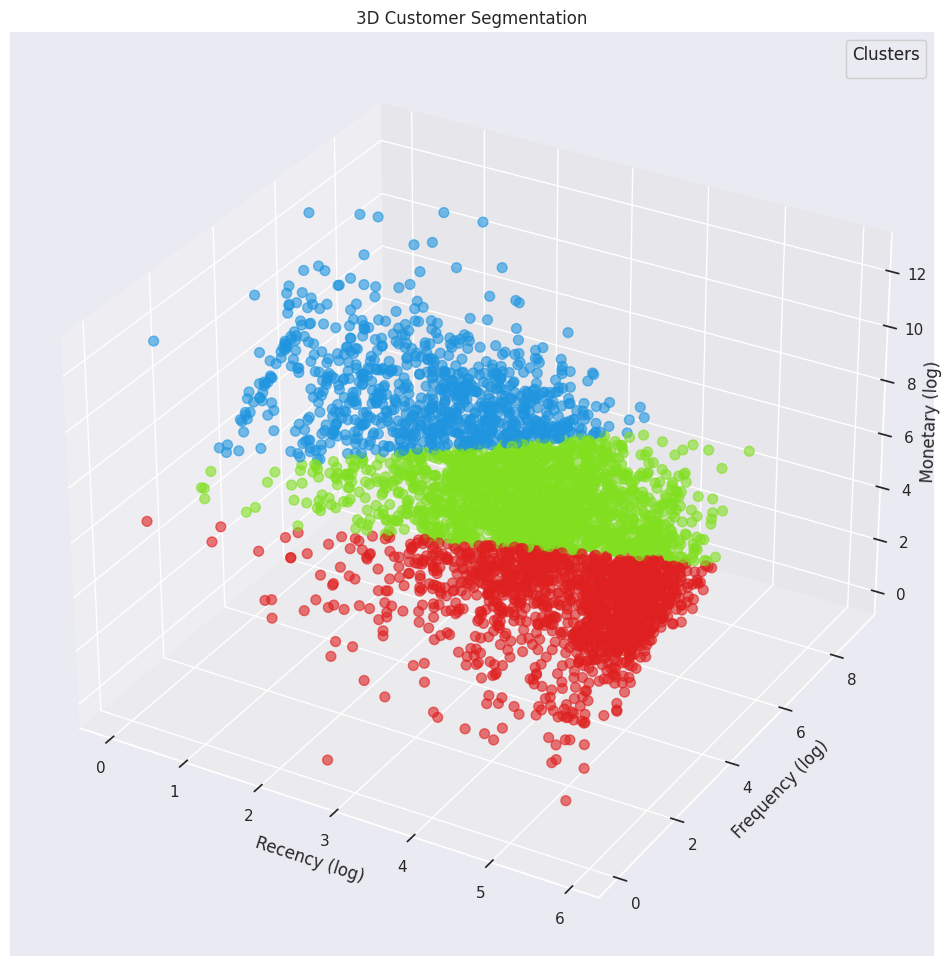

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points with cluster colors
scatter = ax.scatter(
    rfm_df.Recency_log,  # X-axis
    rfm_df.Frequency_log,  # Y-axis
    rfm_df.Monetary_log,  # Z-axis
    c=rfm_df.c,  # Cluster colors
    marker='o',
    s=50,
    alpha=0.6
)

# Set labels for each axis
ax.set_xlabel('Recency (log)')
ax.set_ylabel('Frequency (log)')
ax.set_zlabel('Monetary (log)',labelpad=0)

# Set a title for the plot
ax.set_title('3D Customer Segmentation')

# Add a legend based on cluster colors
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend1)

plt.show()


**Observations**
- **High Value** - Customers in the Blue Cluster are High Value customers because their Recency value is low, & Frequency and Monetary values are high. Meaning they have made more purchases recently with high monetary value.
- **Average Value** - Customers in the Green cluster are Average value customers because their Recency value is higher than that of Blue cluster and Frequency and Monetary is a little lower.
- **Low Value** - Customers in the Red cluster are Low Value customers because their Recency value is the highest among all the clusters and their Frequency and Monetary is the least.

#### **Applying Dendrogram**

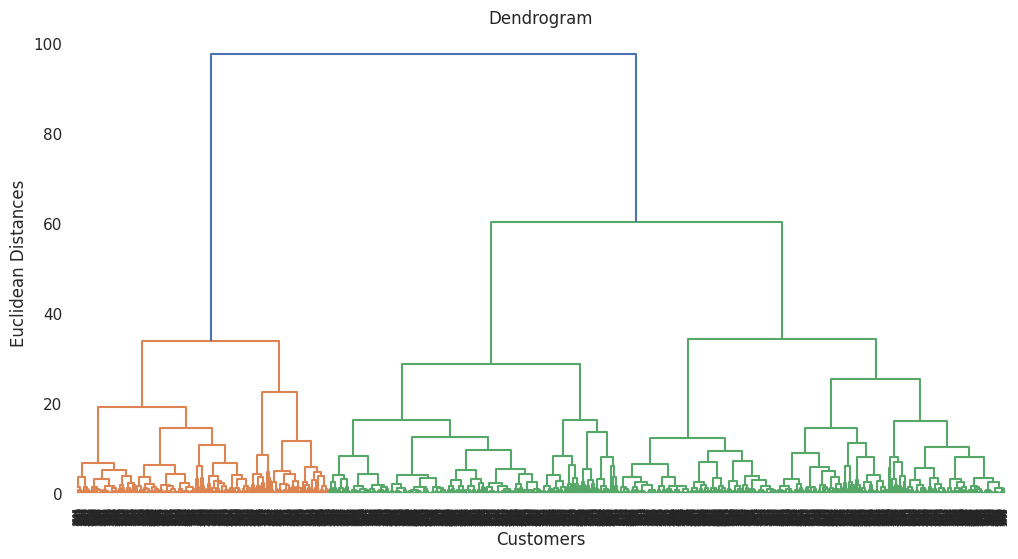

In [ ]:
import scipy.cluster.hierarchy as sch

# Create a dendrogram for hierarchical clustering
plt.figure(figsize=(12,6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()


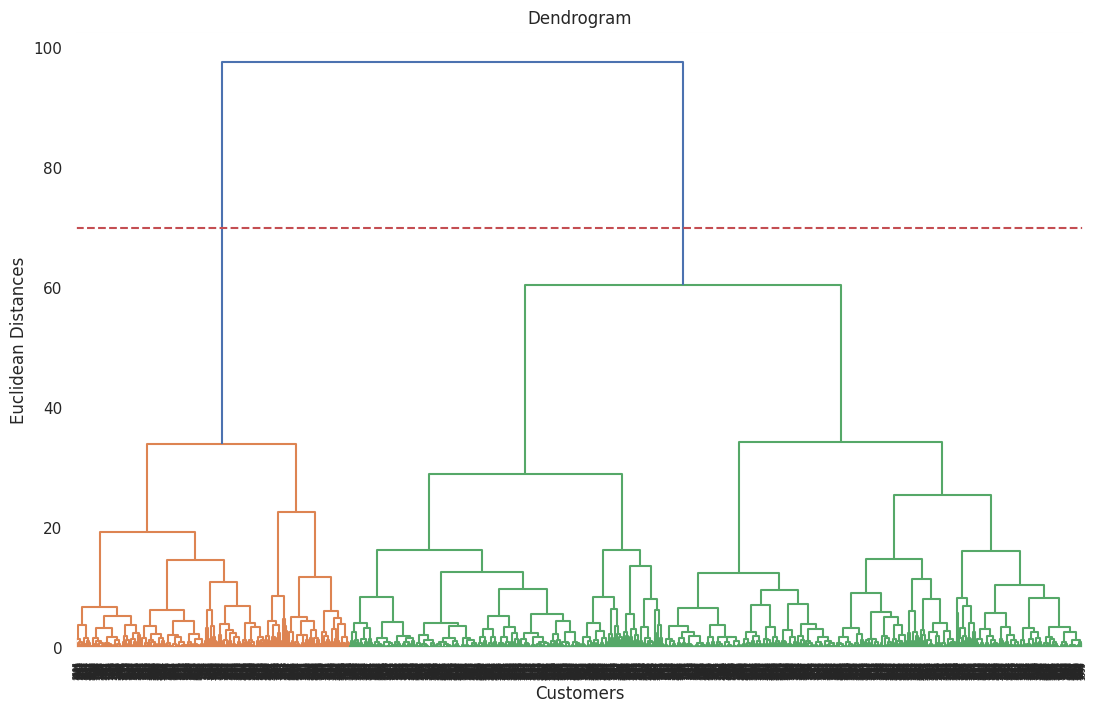

In [ ]:
plt.figure(figsize=(13, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=70, color='r', linestyle='--')
plt.show()

From the Dendrogram we got 2 as the appropriate number of clusters.

In [ ]:
# Fitting hierarchical clustering to this dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

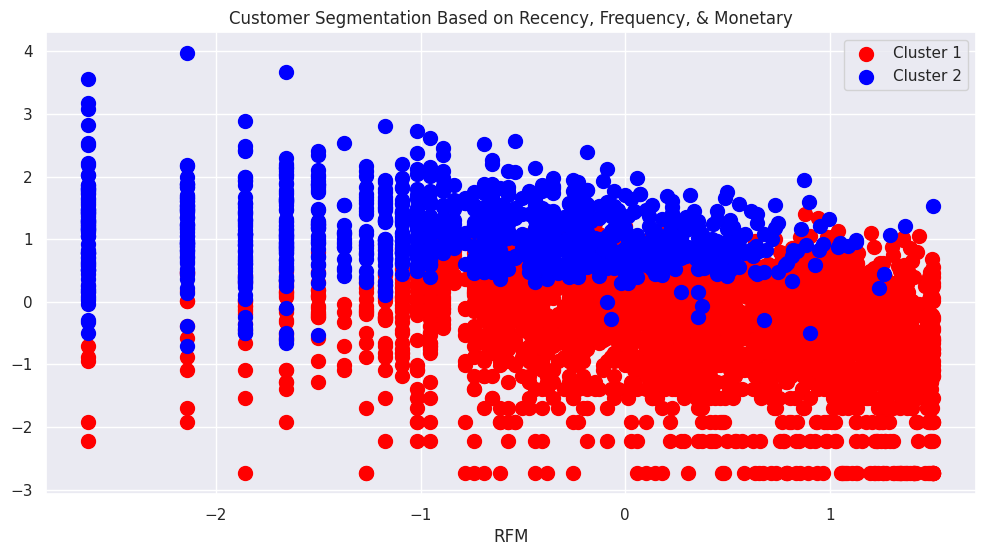

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(12,6))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Customer Segmentation Based on Recency, Frequency, & Monetary')
plt.xlabel('RFM')
plt.legend()
plt.show()

From Dendrogram we got a clear separation of the customers based on Recency, Frequecny, & Monetary.

### **Applying DBSCAN on Recency, Frequency, & Monetary**

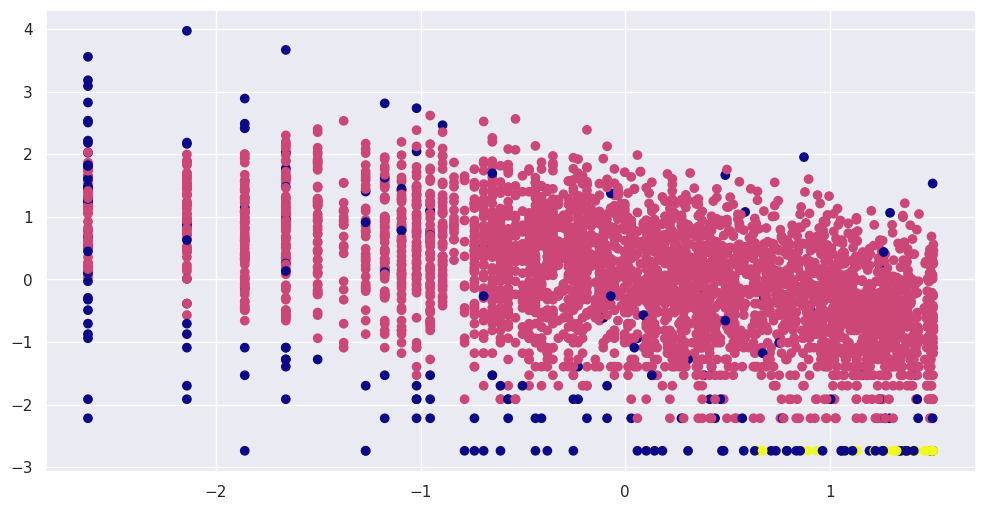

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y_pred,cmap= 'plasma')

Here, using DBSCAN we got 3 clusters of the customers based on Recency, Frequecny, & Monetary.

In [ ]:
# Create a list of data
data = [
    ['1', 'K-Means with silhouette_score', 'RM', 2],
    ['2', 'K-Means with Elbow methos', 'RM', 2],
    ['3', 'DBSCAN', 'RM', 3],
    ['4', 'K-Means with silhouette_score', 'FM', 3],
    ['5', 'K-Means with Elbow methos', 'FM', 3],
    ['6', 'DBSCAN', 'FM', 3],
    ['7', 'K-Means with silhouette_score', 'RFM', 3],
    ['8', 'K-Means with Elbow methos', 'RFM', 3],
    ['9', 'Hierarchical clustering', 'RFM', 2],
    ['10', 'DBSCAN', 'RFM', 3],
]

# Create a dataframe
model_df = pd.DataFrame(data, columns=['SL No.', 'Model_Name', 'Data', 'Optimal_Number_of_cluster'])

model_df = model_df.set_index('SL No.')
# Print the dataframe
model_df.head(None)


Model_Name Data  Optimal_Number_of_cluster
SL No.                                                               
1       K-Means with silhouette_score   RM                          2
2           K-Means with Elbow methos   RM                          2
3                              DBSCAN   RM                          3
4       K-Means with silhouette_score   FM                          3
5           K-Means with Elbow methos   FM                          3
6                              DBSCAN   FM                          3
7       K-Means with silhouette_score  RFM                          3
8           K-Means with Elbow methos  RFM                          3
9             Hierarchical clustering  RFM                          2
10                             DBSCAN  RFM                          3

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
pip install joblib

In [ ]:
# Save the File

import joblib

best_kmeans_model = kmeans

# Define the file path
model_filename = 'best_kmeans_model.pkl'

# Save the model to a file using joblib
joblib.dump(best_kmeans_model, model_filename)

print(f"Best K-Means model saved to {model_filename}")


Best K-Means model saved to best_kmeans_model.pkl


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
# Load the saved model from the file
loaded_model = joblib.load(model_filename)

# Now, 'loaded_model' contains the K-Means model that can be used for predictions


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. **Distinct Customer Groups**: Through the analysis of Recency, Frequency, and Monetary (RFM) values, it's evident that the customers in the dataset can be divided into three distinct groups. These groups likely represent different customer segments with varying behaviors and characteristics.

2. **Targeted Marketing Potential**: The identification of these three distinct customer groups opens up opportunities for targeted marketing campaigns. Each group is likely to have unique needs, preferences, and purchase patterns. This segmentation allows the company to tailor its marketing efforts to better resonate with each group.

3. **Improved Customer Engagement**: By understanding the specific behaviors and tendencies of each segment, the company can engage with customers more effectively. This might involve personalized recommendations, special promotions, or communication strategies that align with the preferences of each group.

4. **Business Strategy Refinement**: These insights can contribute to the refinement of the company's overall business strategy. For instance, the company may choose to allocate resources differently based on the potential value of each segment or prioritize product development to cater to specific segment needs.

5. **Iterative Process**: Customer segmentation is an iterative process. As the company collects more data and evolves its strategies, the segmentation model and customer groups may need adjustments. Regularly revisiting the segmentation approach ensures that it remains relevant to changing business conditions.

In summary, the identification of three distinct customer groups based on RFM values is a valuable outcome for the company. It sets the stage for more targeted and effective marketing efforts, improved customer engagement, and data-driven business decisions.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***